# 1 Введение

## 1.1 Постановка задачи

*Заказчик* -- агенство недвижимости  
  
*Задача* -- научиться определять рыночную стоимость объектов недвижимости; для этого необходимо установить параметры -- это позволит построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность

## 1.2 Исходные данные

### 1.2.1 Общее описание

Переданные данные от Заказчика — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. На основании этих данных необходимо научиться определять рыночную стоимость объектов недвижимости. Основная задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.  
  
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных, например -- расстояние до центра, аэропорта, ближайшего парка и водоёма.

### 1.2.2 Переданные файлы
- real_estate_data.csv

### 1.2.3 Описание набора данных: 
- *airports_nearest* — расстояние до ближайшего аэропорта в метрах (м)
- *balcony* — число балконов
- *ceiling_height* — высота потолков (м)
- *cityCenters_nearest* — расстояние до центра города (м)
- *days_exposition* — сколько дней было размещено объявление (от публикации до снятия)
- *first_day_exposition* — дата публикации
- *floor* — этаж
- *floors_total* — всего этажей в доме
- *is_apartment* — апартаменты (булев тип)
- *kitchen_area* — площадь кухни в квадратных метрах (м²)
- *last_price* — цена на момент снятия с публикации
- *living_area* — жилая площадь в квадратных метрах(м²)
- *locality_name* — название населённого пункта
- *open_plan* — свободная планировка (булев тип)
- *parks_around3000* — число парков в радиусе 3 км
- *parks_nearest* — расстояние до ближайшего парка (м)
- *ponds_around3000* — число водоёмов в радиусе 3 км
- *ponds_nearest* — расстояние до ближайшего водоёма (м)
- *rooms* — число комнат
- *studio* — квартира-студия (булев тип)
- *total_area* — площадь квартиры в квадратных метрах (м²)
- *total_images* — число фотографий квартиры в объявлении

## 1.3 План обработки и анализа данных

### 1.3.1 Предобработка данных (по всем столбцам набора данных)
 - переименование столбцов с той целью, чтобы их названия были выполнены в одном стиле и соответствовали данным, хранящимся в них;
 - определить,изучить и обработать пропущенные значения -- удалить или заменить их на релевантные величины;
 - приведение данных к нужным типам.  

### 1.3.2 Дополнение данных
 - цена квадратного метра;
 - день недели, месяц и год публикации объявления;
 - этаж квартиры: варианты — первый, последний, другой;
 - соотношение жилой и общей площади, а также отношение площади кухни к общей.

### 1.3.3. Исследовательский анализ данных
 - изучить следующие параметры: площадь, цена, число комнат, высота потолков; построить гистограммы для каждого параметра;
 - изучить время продажи квартиры; построить гистограмму; посчитать среднее и медиану; выяснить, сколько времени обычно занимает продажа; определить когда можно считать, что продажи прошли очень быстро, а когда необычно долго;
 - убрать редкие и выбивающиеся значения;
 - определить, какие факторы больше всего влияют на стоимость квартиры; изучить, как зависит цена от квадратного метра, числа комнат, удалённости от центра; изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом, зависимость от даты размещения: дня недели, месяца и года.
 - выбрать 10 населённых пунктов с наибольшим числом объявлений; посчитать среднюю цену квадратного метра в этих населённых пунктах; выделить населённые пункты с самой высокой и низкой стоимостью жилья;
 - выделить квартиры в Санкт-Петербурге; выяснить, какая область входит в центр -- создать столбец с расстоянием до центра в километрах: округлить до целых значений, посчитать среднюю цену для каждого километра, построить график: он должен показывать, как цена зависит от удалённости от центра;
 - выделить сегмент квартир в центре; проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков; также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).  

### 1.3.4 Вывод

## 1.4 Пользовательские функции

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Глобальные константы

NONE = -1

In [3]:
def num_quick_view(column):
    '''
    Функция вывода общей информации о столбце с числовыми данными.
    Выводимый массив уникальных значений отсортирован, поэтому первое и последнее значение массива
    является минимумом и максимум значений столбца соответственно.
    '''
    print(np.sort(column.unique()))
    if isinstance(column[1], float):
        if column.apply(lambda x: x%1 != 0).sum() == 0:
            print('Дробная часть всех значений равна нулю')
        else:
            print('Дробная часть НЕ всех значений равна нулю')

In [4]:
def value_counts_percent(column, ret=False):
    '''
    Функция вывода количества и процента от общего числа значений столбца
    '''
    temp_df = pd.DataFrame({
                'count':column.value_counts(),
                'percent': column.value_counts() / len(column) * 100})

    if ret: return temp_df
    else: print(temp_df)

In [5]:
def count_percent(query):
    '''
    Функция вывода количества и процента от общего числа значений 
    '''
    print('count:', query)
    print('percent:', query / flats.shape[0] * 100)

In [6]:
def null_counts_percent(column):
    '''
    Функция вывода количества и процента от общего числа NAN значений столбца
    '''
    print('count:', column.isna().sum())
    print('percent:', column.isna().sum() / flats.shape[0] * 100)

In [7]:
def  create_cat(row, grp_column=''):
    '''
    Функция разделения данных на группы
    
    grp_column -- столбец, по которому идёт группировка
    '''
    value = row[grp_column]
    if value < gr_1:
        return 1
    if value < gr_2:
        return 2
    if value < gr_3:
        return 3
    if value < gr_4:
        return 4
    if value < gr_5:
        return 5
    if value < gr_6:
        return 6
    if value < gr_7:
        return 7
    if value < gr_8:
        return 8
    if value < gr_9:
        return 9
    #gr_10
    return 10

In [8]:
def hists(column, bottom_count_hists, bins=10, ranges=[], figsize=(15,5)):
    '''
    Функция вывода двух строк гистограмм по столбцу данных -- верхняя гистограмма по всему диапазону данных, 
    нижние -- с ограничениями
    
    column, Pandas.Series - исследуемый столбец
    bottom_count_hists, int64 - количество гистограмм в нижней строке
    bins, int64 - количество корзин гистограмм
    ranges, [tuple(int64, int64), ...] - границы нижних гистограмм
    
    '''
    if bottom_count_hists == 0:
        column.hist(bins=bins, figsize=figsize)
    else:
        fig = plt.figure(constrained_layout=True, figsize=figsize)
        
        gs = GridSpec(2, bottom_count_hists, figure=fig)
        
        hists = [plt.subplot(gs.new_subplotspec((0, 0), colspan=bottom_count_hists))]
        hists[0].hist(column, bins=bins)
    
        for i in range(0, bottom_count_hists):
            hists.append(plt.subplot(gs.new_subplotspec((1, i), colspan=1)))
            hists[i+1].hist(column, bins=bins, range=ranges[i])
    
    plt.show()

In [9]:
def rare_out_plot(column, figsize=(15,5)):
    '''
    Функция вывода графиков выбивающихся и редких значений
    
    '''
    fig = plt.figure(constrained_layout=True, figsize=figsize)
    gs = GridSpec(1, 2, figure=fig)
    
    plot_1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=1))
    plot_2 = plt.subplot(gs.new_subplotspec((0, 1), colspan=1))
    
    tmp_df = column.sort_values().reset_index(drop=True)
    step = 100 / tmp_df.shape[0]
    tmp_df.index = [i * step for i in range(0, tmp_df.shape[0])]
    plot_1.plot(tmp_df)
    plot_1.set_title('Выбивающиеся значения')
    plot_1.set_xlabel('Полный набор, %')
    plot_1.set_ylabel('Значения')
   
    tmp_df = value_counts_percent(column, ret=True)
    tmp_df = tmp_df['percent']
    step = 100 / tmp_df.shape[0]
    tmp_df.index = [i * step for i in range(0, tmp_df.shape[0])]
    plot_2.plot(tmp_df)
    plot_2.set_title('Однообразие значений')
    plot_2.set_xlabel('Полный набор, %')
    plot_2.set_ylabel('Повторы значений, %')
    
    plt.show()

In [10]:
def cut_value_counts_percent(column, cut_percent, ret=False):
    '''
    Функция оценки процента отсечения редких значений
    
    in:
    column, Pandas.Series - исследуемый столбец
    cut_percent, float64 - отсекаемый процент
    '''
    tmp_df = value_counts_percent(column, ret=True)
    
    safe_percent = 0

    for i in tmp_df.index:
        safe_percent = safe_percent + tmp_df.loc[i, 'percent']
        if safe_percent >= (100 - cut_percent):
            cuted_temp_df = tmp_df.loc[:i,:]
            break

    if ret: return cuted_temp_df
    else: print(cuted_temp_df) 

In [11]:
def drop_rare_out_values(column, quantile=0.99, cut_percent=1):
    '''
    Функция удаления редких и выбивающихся значений столбца
    
    in:
    column, Pandas.Series - исследуемый столбец
    quantile, float64 - квантиль группы выбивающихся значений, -1 (NONE) - выбивающиеся значения не определять
    cut_percent, int64 - процент удаляемых редких значений, -1 (NONE) - редкие значения не определять
    
    return:
    [median_before, median_after] - значение медиан до и после удаления редких, выбивающихся значений
    '''

    global flats
    
    medians = [column.median()]
    drop_values = []
    
    if quantile != NONE:
        q_value = column.quantile(quantile)

        # Добавление выбивающихся значений
        for i in column:
            if i >= q_value:
                drop_values.append(i)

    if cut_percent != NONE:
        tmp_df = value_counts_percent(column, ret=True)

        safe_percent = 0

        # Добавление редких значений
        for i in tmp_df.index:
            if safe_percent >= (100 - cut_percent):
                drop_values.append(i)
            safe_percent = safe_percent + tmp_df.loc[i, 'percent']
    
    # Удаление редких и выбивающихся значений
    flats = flats.loc[~column.isin(drop_values),:]
    
    medians.append(column.median())
    
    return medians

# 2 Предобработка данных

## 2.1 Общий взгляд на данные

In [12]:
flats = pd.read_csv('real_estate_data.csv')

In [13]:
flats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            23699 non-null  int64  
 1   total_images          23699 non-null  int64  
 2   last_price            23699 non-null  float64
 3   total_area            23699 non-null  float64
 4   first_day_exposition  23699 non-null  object 
 5   rooms                 23699 non-null  int64  
 6   ceiling_height        14504 non-null  float64
 7   floors_total          23613 non-null  float64
 8   living_area           21796 non-null  float64
 9   floor                 23699 non-null  int64  
 10  is_apartment          2775 non-null   object 
 11  studio                23699 non-null  bool   
 12  open_plan             23699 non-null  bool   
 13  kitchen_area          21421 non-null  float64
 14  balcony               12180 non-null  float64
 15  locality_name      

In [14]:
pd.set_option('display.max_columns', None)
flats.head(10)

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


***Промежуточный итог***  
  
При первом, общем взгляде на данные можно сделать следующие выводы:
 - набор данных содержит 22 столбца и 23699 строк;
 - необходимо перименовать столбцы:
  - _*cityCenters_nearest*_ в _*city_centers_nearest*_ ;
  - _*parks_around3000*_ в _*parks_around_3000*_ ;
  - _*ponds_around3000*_ в _*ponds_around_3000*_ ;
 - имеют пропуски в данных столбцы:
  - _*ceiling_height*_ ;
  - _*floors_total*_ ;
  - _*living_area*_ ;
  - _*is_apartment*_ ;
  - _*kitchen_area*_ ;
  - _*balcony*_ ;
  - _*locality_name*_ ;
  - _*airports_nearest*_ ;
  - _*cityCenters_nearest*_ ;
  - _*parks_around3000*_ ;
  - _*parks_nearest*_ ;
  - _*ponds_around3000*_ ;
  - _*ponds_nearest*_ ;
  - _*days_exposition*_ ;
 - необходимо сменить тип данных столбцов:
  - _*last_price*_ с float64 в in64;
  - _*floors_total*_ с float64 в in64;
  - _*is_apartment*_ c object в bool;
  - _*balcony*_ с float64 в in64;
  - _*airports_nearest*_ с float64 в in64;
  - _*cityCenters_nearest*_ с float64 в in64;
  - _*parks_around3000*_ с float64 в in64;
  - _*parks_nearest*_ с float64 в in64;
  - _*ponds_around3000*_ с float64 в in64;
  - _*ponds_nearest*_ с float64 в in64;
  - _*days_exposition*_ с float64 в in64;

## 2.2 Переименование столбцов

In [15]:
flats.rename(columns={
                'cityCenters_nearest': 'city_centers_nearest', 
                'parks_around3000': 'parks_around_3000', 
                'ponds_around3000': 'ponds_around_3000'}, 
             inplace=True)
flats.columns

Index(['Unnamed: 0', 'total_images', 'last_price', 'total_area',
       'first_day_exposition', 'rooms', 'ceiling_height', 'floors_total',
       'living_area', 'floor', 'is_apartment', 'studio', 'open_plan',
       'kitchen_area', 'balcony', 'locality_name', 'airports_nearest',
       'city_centers_nearest', 'parks_around_3000', 'parks_nearest',
       'ponds_around_3000', 'ponds_nearest', 'days_exposition'],
      dtype='object')

## 2.3 Удаление пропусков

### 2.3.1 Столбец *total_images*

In [16]:
num_quick_view(flats['total_images'])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 35 37 39 42 50]


Предобработки не требует

### 2.3.2 Столбец *last_price*

In [17]:
num_quick_view(flats['last_price'])

[1.219e+04 4.300e+05 4.400e+05 ... 4.013e+08 4.200e+08 7.630e+08]
Дробная часть всех значений равна нулю


Поскольку дробная часть всех значений столбца равна нулю имеет смысл преобразовать тип данных столбца в *int*

In [18]:
flats['last_price'] = flats['last_price'].astype(int)
flats['last_price'].head(5)

0    13000000
1     3350000
2     5196000
3    64900000
4    10000000
Name: last_price, dtype: int32

### 2.3.3 Столбец *total_area*

In [19]:
num_quick_view(flats['total_area'])

[ 12.   13.   13.2 ... 631.  631.2 900. ]
Дробная часть НЕ всех значений равна нулю


Предобработки на данном этапе не требует. Требуется дополнительное исследование данных столбца на предмет редких и выбивающихся значений

### 2.3.4 Столбец *first_day_exposition* 

In [20]:
print(flats['first_day_exposition'].unique())

['2019-03-07T00:00:00' '2018-12-04T00:00:00' '2015-08-20T00:00:00' ...
 '2014-12-29T00:00:00' '2016-09-12T00:00:00' '2015-07-19T00:00:00']


Значения столбца необходимо преобразовать из строкового типа данных в тип *datetime*

In [21]:
pd.to_datetime(flats['first_day_exposition'], format='%Y-%m-%d %H:%M:%S')
flats['first_day_exposition'].head(5)

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

### 2.3.5 Столбец *rooms*

In [22]:
num_quick_view(flats['rooms'])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 19]


In [23]:
value_counts_percent(flats['rooms'])

    count    percent
1    8047  33.955019
2    7940  33.503523
3    5814  24.532681
4    1180   4.979113
5     326   1.375585
0     197   0.831259
6     105   0.443057
7      59   0.248956
8      12   0.050635
9       8   0.033757
10      3   0.012659
14      2   0.008439
11      2   0.008439
19      1   0.004220
12      1   0.004220
16      1   0.004220
15      1   0.004220


Количество комнат более 5 вполне допустимо для квартир дорого и элитного сегмента. При этом количество объявлений данных квартир не велико -- не более 3%. Поэтому в наборе данных оставим их без изменения.

Количество комнат равное 0 верно для квартиры-студии. Проверим данное утрвеждение -- определим процент квартир с нулевым количеством комнат, не являющихся квартирами-студями

In [24]:
count_percent(flats.loc[(flats['rooms'] == 0) & (~flats['studio']),'rooms'])

count: 349      0
508      0
780      0
839      0
946      0
1574     0
1625     0
2532     0
3019     0
4115     0
4437     0
4683     0
4876     0
5749     0
6472     0
6612     0
6805     0
7008     0
7237     0
7286     0
7818     0
9412     0
9586     0
9861     0
10284    0
10606    0
11035    0
11051    0
11157    0
11331    0
11692    0
11705    0
12412    0
12691    0
13953    0
15105    0
15273    0
15434    0
16429    0
17695    0
17729    0
17805    0
17824    0
18042    0
18549    0
18782    0
19392    0
19477    0
19735    0
19917    0
20002    0
20045    0
20054    0
20793    0
21299    0
21628    0
22573    0
23442    0
23592    0
Name: rooms, dtype: int64
percent: 349      0.0
508      0.0
780      0.0
839      0.0
946      0.0
1574     0.0
1625     0.0
2532     0.0
3019     0.0
4115     0.0
4437     0.0
4683     0.0
4876     0.0
5749     0.0
6472     0.0
6612     0.0
6805     0.0
7008     0.0
7237     0.0
7286     0.0
7818     0.0
9412     0.0
9586     0.0
9861     0

In [25]:
print('count:', flats.loc[(flats['rooms'] == 0) & (~flats['studio']),'rooms'].count())
print('percent:', flats.loc[(flats['rooms'] == 0) & (~flats['studio']),'rooms'].count() / flats.shape[0] * 100)

count: 59
percent: 0.24895565213722098


Нулевое количество комнат для не квартир-студий является ошибкой. Возможность заполнить данные аномальные значения референтными не предоставляется возможным. Поэтому, ввиду малого процента данных квартир, они могут быть удалены из набора данных.

In [26]:
flats = flats.loc[(flats['rooms'] != 0) | ((flats['rooms'] == 0) & (flats['studio'])),:]

In [27]:
# Проверка
flats.loc[(flats['rooms'] == 0) & (~flats['studio']),'rooms'].count() / flats.shape[0] * 100

0.0

### 2.3.6 Столбец *floors_total*

In [28]:
num_quick_view(flats['floors_total'])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 33. 34. 35. 36. 37. 52. 60.
 nan]
Дробная часть НЕ всех значений равна нулю


In [29]:
null_counts_percent(flats['floors_total'])

count: 86
percent: 0.3637901861252115


Пропуск этажности дома является ошибкой. Возможность заполнить данные аномальные значения референтными не предоставляется возможным. Поэтому, ввиду малого процента данных квартир, они могут быть удалены из набора данных.

In [30]:
flats.dropna(subset=['floors_total'], inplace=True)
num_quick_view(flats['floors_total'])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 33. 34. 35. 36. 37. 52. 60.]
Дробная часть всех значений равна нулю


Этажность дома -- величина целочисленная. Поэтому тип данных столбца преобразуем в тип *int64*

In [31]:
flats['floors_total'] = flats['floors_total'].astype(int)
num_quick_view(flats['floors_total'])

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 33 34 35 36 37 52 60]


### 2.3.7 Столбец *ceiling_height*

In [32]:
num_quick_view(flats['ceiling_height'])

[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66   3.67   3.68   3.69
   3.7    3.75   3.76   3.78   3.8    3.82   3.83   3.84   3.85   3.86
   3.8

In [33]:
null_counts_percent(flats['ceiling_height'])

count: 9069
percent: 38.50301435000424


Процент пропусков в столбце существеннен, удалению данные строки не подлежат. Поэтому пропуски необходимо заполнить какими-то значениями.  
Высота потолков сильнее всего связана с высотой здания, т.е. с его этажностью. Поэтому пропуски заменим на медианные значения соответствующих групп по этажности (по категориям столбца *floors_total*).

In [34]:
floors_totals = flats['floors_total'].unique()
for i in floors_totals:
    median = flats.loc[(flats['floors_total'] == i) & (~flats['ceiling_height'].isnull()), 'ceiling_height'].median()
    flats.loc[(flats['floors_total'] == i) & (flats['ceiling_height'].isnull()), 'ceiling_height'] = median

In [35]:
null_counts_percent(flats['ceiling_height'])

count: 1
percent: 0.004245563386261357


Один пропуск заменить не удалось -- такая этажность была единственная и высота потолков для неё была пропущена. Удалим его из набора данных.

In [36]:
flats.dropna(subset=['ceiling_height'], inplace=True)
print('count:', flats['ceiling_height'].isna().sum())

count: 0


### 2.3.8 Столбец *living_area*

In [37]:
num_quick_view(flats['living_area'])

[  2.    3.    5.  ... 409.  409.7   nan]
Дробная часть НЕ всех значений равна нулю


In [38]:
null_counts_percent(flats['living_area'])

count: 1866
percent: 7.92255763596994


Процент пропущенных значений жилой площади ощутимо высок. Пропуски заменим на медианные значения соответствующих групп по общей площади квартиры (по категориям столбца *total_area*). Для этого добавим в набор данных столбец *total_area_grp*, в котором укажем группу квартиры по общей площади. Выделим 10 групп квартир по площади, граничные значения площадей выберем по квантилям данных.

In [39]:
gr_1 = flats['total_area'].quantile(0.1)
gr_2 = flats['total_area'].quantile(0.2)
gr_3 = flats['total_area'].quantile(0.3)
gr_4 = flats['total_area'].quantile(0.4)
gr_5 = flats['total_area'].quantile(0.5)
gr_6 = flats['total_area'].quantile(0.6)
gr_7 = flats['total_area'].quantile(0.7)
gr_8 = flats['total_area'].quantile(0.8)
gr_9 = flats['total_area'].quantile(0.9)

flats['total_area_grp'] = flats.apply(create_cat, axis=1, grp_column='total_area')
flats['total_area_grp'].unique()

array([10,  3,  6,  1,  2,  8,  7,  4,  9,  5], dtype=int64)

In [40]:
flats['total_area_grp'] = flats.apply(create_cat, axis=1, grp_column='total_area')
total_area_grps = flats['total_area_grp'].unique()

for i in total_area_grps:
    median = flats.loc[(flats['total_area_grp'] == i) & (~flats['living_area'].isnull()), 'living_area'].median()
    flats.loc[(flats['total_area_grp'] == i) & (flats['living_area'].isnull()), 'living_area'] = median

In [41]:
null_counts_percent(flats['living_area'])

count: 0
percent: 0.0


### 2.3.9 Столбец *floor*

In [42]:
num_quick_view(flats['floor'])

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 33]


Предобработки не требует

### 2.3.10 Столбец *is_apartment*

In [43]:
flats['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [44]:
null_counts_percent(flats['is_apartment'])

count: 20780
percent: 88.22655288073706


Апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания. Это редкое являение на рынке жилой недвижимости в России, поскольку, являясь помещением нежилого фонда, не дает право регистрации в нем. Поэтому будем считать пропуски значений данного столбца равным *<font color=green>False</font>*.

In [45]:
flats.loc[flats['is_apartment'].isna(), ['is_apartment']] = False
null_counts_percent(flats['is_apartment'])

count: 0
percent: 0.0


### 2.3.11 Столбец *studio*

In [46]:
flats['is_apartment'].unique()

array([False, True], dtype=object)

Предобработки не требует

### 2.3.12 Столбец *open_plan*

In [47]:
flats['is_apartment'].unique()

array([False, True], dtype=object)

Предобработки не требует

### 2.3.13 Столбец *kitchen_area*

In [48]:
#num_quick_view(flats['kitchen_area'])

In [49]:
null_counts_percent(flats['kitchen_area'])

count: 2172
percent: 9.221755190421604


Процент пропущенных значений площади кухни ощутимо высок. Пропуски заменим на медианные значения соответствующих групп по общей площади квартиры (по категориям столбца *total_area*).

In [50]:
for i in total_area_grps:
    median = flats.loc[(flats['total_area_grp'] == i) & (~flats['kitchen_area'].isnull()), 'kitchen_area'].median()
    flats.loc[(flats['total_area_grp'] == i) & (flats['kitchen_area'].isnull()), 'kitchen_area'] = median

In [51]:
null_counts_percent(flats['kitchen_area'])

count: 0
percent: 0.0


### 2.3.14 Столбец *balcony*

In [52]:
num_quick_view(flats['balcony'])

[ 0.  1.  2.  3.  4.  5. nan]
Дробная часть НЕ всех значений равна нулю


In [53]:
null_counts_percent(flats['balcony'])

count: 11467
percent: 48.68594234280134


Пропущенные значения будем считать фактом отсуствия балкона, т.е. заменим *null*-значения на 0. Тип данных столбца сменим на *int64*.

In [54]:
flats['balcony'].fillna(0, inplace=True)
flats['balcony'] = flats['balcony'].astype(int)
num_quick_view(flats['balcony'])

[0 1 2 3 4 5]


### 2.3.15 Столбец *locality_name*

In [55]:
flats['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [56]:
null_counts_percent(flats['locality_name'])

count: 48
percent: 0.20379569481594703


Количество пропусков ничтожно мало, поэтому записи с пропусками могут быть удалены.

In [57]:
flats['locality_name'].dropna(inplace=True)
null_counts_percent(flats['locality_name'])

count: 0
percent: 0.0


### 2.3.16 Столбец *airports_nearest*

In [58]:
num_quick_view(flats['airports_nearest'])

[    0.  6450.  6914. ... 84853. 84869.    nan]
Дробная часть НЕ всех значений равна нулю


Наиболее вероятно нулевое значение расстояния говорит об отсутствии в допустимой близости аэропортов. Однако такая "заглушка" не соответствует смыслу данных столбца -- расстояние до аэропорта. В этой логике, 0 км означают, что квартира расположена на территории аэропорта. Для корректного хранения подобного рода информации и для упрщения работы с DataFrame заменим "заглушку" на '-1' (NONE), как алогичную с точки зрения расстояния до аэропорта
  
Пропущенные значения заменим на 0. Значения удаленности преобразуем к типу *int64*

In [59]:
flats['airports_nearest'] = flats['airports_nearest'].fillna(0)
flats['airports_nearest'] = flats['airports_nearest'].astype(int)
flats.loc[flats['airports_nearest'] == 0, 'airports_nearest'] = NONE
flats['airports_nearest']

0        18863
1        12817
2        21741
3        28098
4        31856
         ...  
23694    24665
23695       -1
23696       -1
23697    39140
23698       -1
Name: airports_nearest, Length: 23553, dtype: int32

### 2.3.17 Столбец *city_centers_nearest*

In [60]:
num_quick_view(flats['city_centers_nearest'])

[  181.   208.   215. ... 65952. 65968.    nan]
Дробная часть НЕ всех значений равна нулю


Пропущенные значения заменим на 0. Значения столбца преобразуем аналогично п.2.3.16

In [61]:
flats['city_centers_nearest'] = flats['city_centers_nearest'].fillna(0)
flats['city_centers_nearest'] = flats['city_centers_nearest'].astype(int)
flats.loc[flats['city_centers_nearest'] == 0, 'city_centers_nearest'] = NONE
flats['city_centers_nearest']

0        16028
1        18603
2        13933
3         6800
4         8098
         ...  
23694     4232
23695       -1
23696       -1
23697    10364
23698       -1
Name: city_centers_nearest, Length: 23553, dtype: int32

### 2.3.18 Столбец *parks_around_3000*

In [62]:
num_quick_view(flats['parks_around_3000'])

[ 0.  1.  2.  3. nan]
Дробная часть НЕ всех значений равна нулю


In [63]:
null_counts_percent(flats['parks_around_3000'])

count: 5480
percent: 23.26667515815395


Пропущенные значения заменим на 0, поскольку отсутствие количества парков будем воспринимать, как их нулевое количество. Значения столбца преобразуем к типу *int64*

In [64]:
flats['parks_around_3000'] = flats['parks_around_3000'].fillna(0)
flats['parks_around_3000'] = flats['parks_around_3000'].astype(int)
num_quick_view(flats['parks_around_3000'])

[0 1 2 3]


### 2.3.19 Столбец *parks_nearest*

In [65]:
num_quick_view(flats['parks_nearest'])

[1.000e+00 3.000e+00 4.000e+00 7.000e+00 9.000e+00 1.000e+01 1.100e+01
 1.200e+01 1.300e+01 1.400e+01 1.500e+01 1.600e+01 1.700e+01 1.800e+01
 1.900e+01 2.000e+01 2.100e+01 2.200e+01 2.300e+01 2.400e+01 2.700e+01
 2.800e+01 3.000e+01 3.200e+01 3.300e+01 3.400e+01 3.500e+01 3.600e+01
 3.700e+01 3.800e+01 3.900e+01 4.000e+01 4.100e+01 4.200e+01 4.300e+01
 4.400e+01 4.500e+01 4.600e+01 4.700e+01 4.800e+01 4.900e+01 5.000e+01
 5.100e+01 5.200e+01 5.300e+01 5.400e+01 5.500e+01 5.600e+01 5.700e+01
 5.800e+01 5.900e+01 6.000e+01 6.100e+01 6.200e+01 6.300e+01 6.400e+01
 6.500e+01 6.600e+01 6.700e+01 6.800e+01 6.900e+01 7.100e+01 7.200e+01
 7.300e+01 7.400e+01 7.500e+01 7.600e+01 7.700e+01 7.800e+01 8.000e+01
 8.100e+01 8.200e+01 8.300e+01 8.400e+01 8.500e+01 8.600e+01 8.700e+01
 8.800e+01 9.000e+01 9.100e+01 9.200e+01 9.300e+01 9.400e+01 9.500e+01
 9.600e+01 9.700e+01 9.800e+01 9.900e+01 1.000e+02 1.010e+02 1.020e+02
 1.030e+02 1.040e+02 1.050e+02 1.060e+02 1.070e+02 1.080e+02 1.090e+02
 1.100

Пропущенные значения заменим на 0. Значения столбца преобразуем аналогично п.2.3.16

In [66]:
flats['parks_nearest'] = flats['parks_nearest'].fillna(0)
flats['parks_nearest'] = flats['parks_nearest'].astype(int)
flats.loc[flats['parks_nearest'] == 0, 'parks_nearest'] = NONE
flats['parks_nearest']

0        482
1         -1
2         90
3         84
4        112
        ... 
23694    796
23695     -1
23696     -1
23697    173
23698     -1
Name: parks_nearest, Length: 23553, dtype: int32

### 2.3.20 Столбец *ponds_around_3000*

In [67]:
num_quick_view(flats['ponds_around_3000'])

[ 0.  1.  2.  3. nan]
Дробная часть НЕ всех значений равна нулю


In [68]:
null_counts_percent(flats['ponds_around_3000'])

count: 5480
percent: 23.26667515815395


Пропущенные значения заменим на 0, поскольку отсутствие количества водоёмов будем воспринимать, как их нулевое количество. Кстати, количество водоёмов равно количеству парков в представленном наборе данных, что вполне логично. Значения столбца преобразуем к типу *int64*

In [69]:
flats['ponds_around_3000'] = flats['ponds_around_3000'].fillna(0)
flats['ponds_around_3000'] = flats['ponds_around_3000'].astype(int)
num_quick_view(flats['ponds_around_3000'])

[0 1 2 3]


### 2.3.21 Столбец *ponds_nearest*

In [70]:
num_quick_view(flats['ponds_nearest'])

[  13.   16.   19. ... 1341. 1344.   nan]
Дробная часть НЕ всех значений равна нулю


Пропущенные значения заменим на 0. Значения столбца преобразуем аналогично п.2.3.16

In [71]:
flats['ponds_nearest'] = flats['ponds_nearest'].fillna(0)
flats['ponds_nearest'] = flats['ponds_nearest'].astype(int)
flats.loc[flats['ponds_nearest'] == 0, 'ponds_nearest'] = NONE
flats['ponds_nearest']

0        755
1         -1
2        574
3        234
4         48
        ... 
23694    381
23695     -1
23696     -1
23697    196
23698     -1
Name: ponds_nearest, Length: 23553, dtype: int32

### 2.3.22 Столбец *days_exposition*

In [72]:
num_quick_view(flats['days_exposition'])

[1.000e+00 2.000e+00 3.000e+00 ... 1.572e+03 1.580e+03       nan]
Дробная часть НЕ всех значений равна нулю


In [73]:
null_counts_percent(flats['days_exposition'])

count: 3172
percent: 13.4674988324205


Процент пропущенных значений ощутимо высок. Пропуски заменим на медианные значения соответствующих групп по цене квартиры (по категориям столбца *last_price*), поскольку цена является комплексной характеристикой спроса на квартиру, которая определяет средний срок актуальности объявления. Для этого добавим в набор данных столбец *last_price_grp*, в котором укажем группу квартиры по цене. Выделим 10 групп квартир по цене, граничные значения цен выберем по квантилям данных. Значения столбца преобразуем к типу *int64*

In [74]:
gr_1 = flats['last_price'].quantile(0.1)
gr_2 = flats['last_price'].quantile(0.2)
gr_3 = flats['last_price'].quantile(0.3)
gr_4 = flats['last_price'].quantile(0.4)
gr_5 = flats['last_price'].quantile(0.5)
gr_6 = flats['last_price'].quantile(0.6)
gr_7 = flats['last_price'].quantile(0.7)
gr_8 = flats['last_price'].quantile(0.8)
gr_9 = flats['last_price'].quantile(0.9)

flats['last_price_grp'] = flats.apply(create_cat, axis=1, grp_column='last_price')
flats['last_price_grp'].unique()

array([10,  3,  6,  9,  2,  4,  7,  5,  8,  1], dtype=int64)

In [75]:
last_price_grps = flats['last_price_grp'].unique()

for i in last_price_grps:
    median = flats.loc[(flats['last_price_grp'] == i) & (~flats['days_exposition'].isnull()), 'days_exposition'].median()
    flats.loc[(flats['last_price_grp'] == i) & (flats['days_exposition'].isnull()), 'days_exposition'] = median

In [76]:
flats['days_exposition'] = flats['days_exposition'].astype(int)
null_counts_percent(flats['days_exposition'])

count: 0
percent: 0.0


**Сброс индексов после удаления пропусков**

In [77]:
flats.reset_index(drop=True, inplace=True)

***Промежуточный итог***  
  
Первый этап подготовки данных завершён -- удалены либо заменены пропуски и явные аномальные значения.   
  
На текущем этапе было выполнено:
- переименованы столбцы в *city_centers_nearest*, *parks_around_3000*, *ponds_around_3000*;
- заменены типы данных:
 - _float64_ на _int64_ для столбцов: *last_price*, *floors_total*, *balcony*, *airports_nearest*, *city_centers_nearest*, *parks_around_3000*, *parks_nearest*, *ponds_around_3000*, *ponds_nearest*, *days_exposition*Ж
 - _str_ в _datetime_ для *first_day_exposition*;
- удалены аномальные значения в столбцах: *rooms*, *floors_total*, *locality_name*;
- заменены аномальные значения на референтные для столбцов: *ceiling_height*, *living_area*, *is_apartment*, *kitchen_area*, *balcony*, *airports_nearest*, *city_centers_nearest*, *parks_around_3000*, *parks_nearest*, *ponds_around_3000*, *ponds_nearest*, *days_exposition*.

# 3 Дополнение данных

**Цена квадратного метра**

In [78]:
flats['square_meter_price'] = flats['last_price'] / flats['total_area']
num_quick_view(flats['square_meter_price'])

[1.11834862e+02 7.96296296e+03 9.61538462e+03 ... 1.54260480e+06
 1.73684211e+06 1.90750000e+06]
Дробная часть НЕ всех значений равна нулю


**День недели публикации объявления**

In [79]:
flats['exposition_day'] = pd.DatetimeIndex(flats['first_day_exposition']).day
flats['exposition_day']

0         7
1         4
2        20
3        24
4        19
         ..
23548    21
23549    15
23550    11
23551    28
23552    21
Name: exposition_day, Length: 23553, dtype: int64

**Месяц публикации объявления**

In [80]:
flats['exposition_month'] = pd.DatetimeIndex(flats['first_day_exposition']).month
flats['exposition_month']

0         3
1        12
2         8
3         7
4         6
         ..
23548     3
23549     1
23550     2
23551     3
23552     7
Name: exposition_month, Length: 23553, dtype: int64

**Год публикации объявления**

In [81]:
flats['exposition_year'] = pd.DatetimeIndex(flats['first_day_exposition']).year
flats['exposition_year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23548    2017
23549    2018
23550    2018
23551    2017
23552    2017
Name: exposition_year, Length: 23553, dtype: int64

**Этаж квартиры в категориях первый, последний, другой**

Для обеспечения возможности дальнейшей обработки категорий этажа квартиры примем следующее перечисление:
- первый -- (-1);
- последний -- 1;
- другой -- 0

In [82]:
def flat_floor_cat(row):
    floor = row['floor']
    floor_total = row['floors_total']
    
    if floor == 1: return -1
    if floor == floor_total: return 1
    return 0

In [83]:
flats['flat_floor'] = flats.apply(flat_floor_cat, axis=1)
flats['flat_floor'].unique()

array([ 0, -1,  1], dtype=int64)

**Cоотношение жилой и общей площади**

In [84]:
flats['living_total_areas_relation'] = flats['living_area'] / flats['total_area']
num_quick_view(flats['living_total_areas_relation'])

[0.02158273 0.03846154 0.06958763 ... 1.13333333 1.28787879 1.30769231]
Дробная часть НЕ всех значений равна нулю


Жилая площадь не может быть больше общей, т.е полученные соотношения не могут быть больше единицы. При этом очень малое соотношение (2, 3%) также является аномальным значением. Значения столбца требуют дальнейшей обработки

**Cоотношение площади кухни и общей площади**

In [85]:
flats['kitchen_total_areas_relation'] = flats['kitchen_area'] / flats['total_area']
num_quick_view(flats['kitchen_total_areas_relation'])

[0.02538071 0.02615063 0.02923977 ... 0.72463768 0.7398374  0.78787879]
Дробная часть НЕ всех значений равна нулю


Кухня размером в 3/4 квартиры? Почему бы нет для ячеечной квартиры.

***Промежуточный итог***  
  
В DataFrame добавленны данные, которые позволят провести более точный и удобный анализ, точнее ответить на поставленные вопросы.

# 4  Исследовательский анализ данных

**Изучить следующие параметры: площадь, цена, число комнат, высота потолков; построить гистограммы для каждого параметра**


**Площадь квартиры**

In [86]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

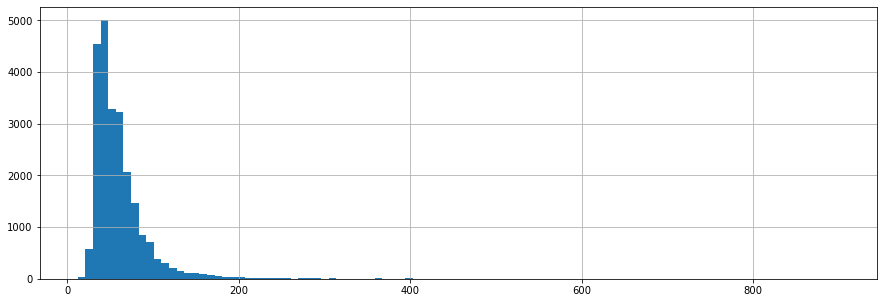

In [87]:
hists(flats['total_area'], 0, bins=100, )

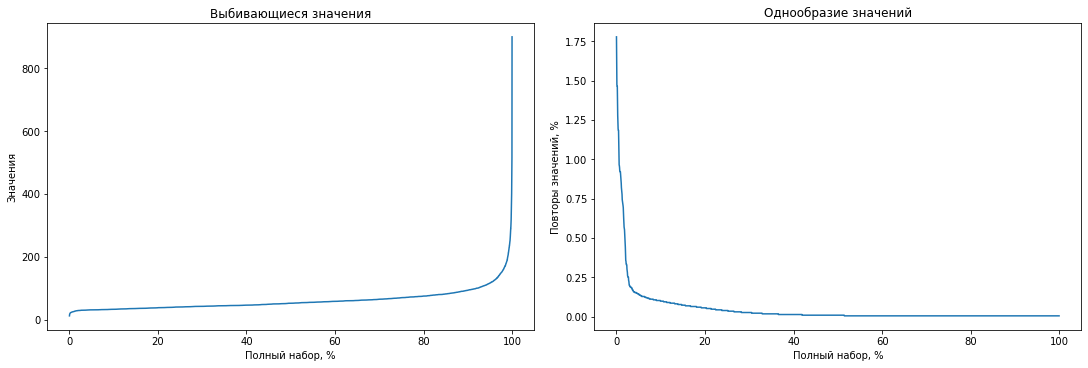

In [88]:
rare_out_plot(flats['total_area'])

In [89]:
flats['total_area'].describe()

count    23553.000000
mean        60.408173
std         35.596579
min         12.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64

In [90]:
flats['total_area'].quantile(0.99)

197.0959999999999

Квартиры с площадью выше 200 м2 составляют 1% от общего их числа. Поэтому могут быть удалены из рассмотрения на текущем этапе, как непредставительные

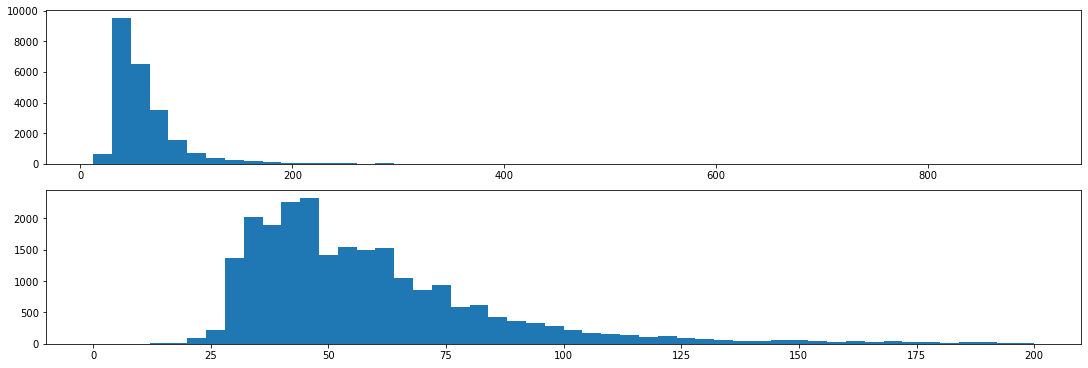

In [91]:
hists(flats['total_area'], 1, 50, [(0, 200)])

In [92]:
flats['total_area'].quantile(0.96)

125.0

***Промежуточный итог***  
  
С первого взгляда видно, что имеются аномальные забросы площадей в 4-ой четверти данных. При этом аномальное количесвто площадей укладывается в 4% от общего числа. Данные значения могут быть впоследствии удалены

**Цена квартиры**

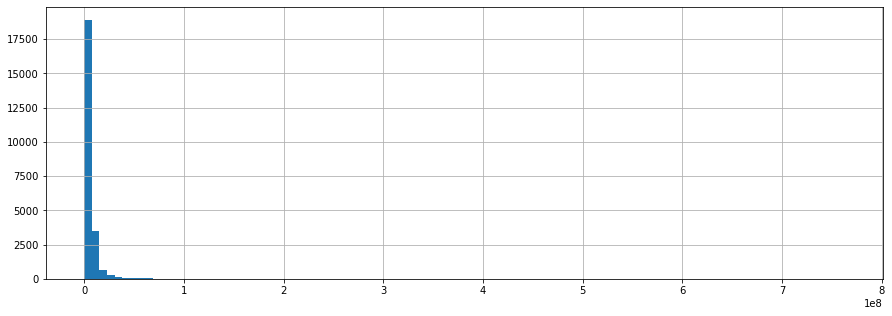

In [93]:
hists(flats['last_price'], 0, bins=100)

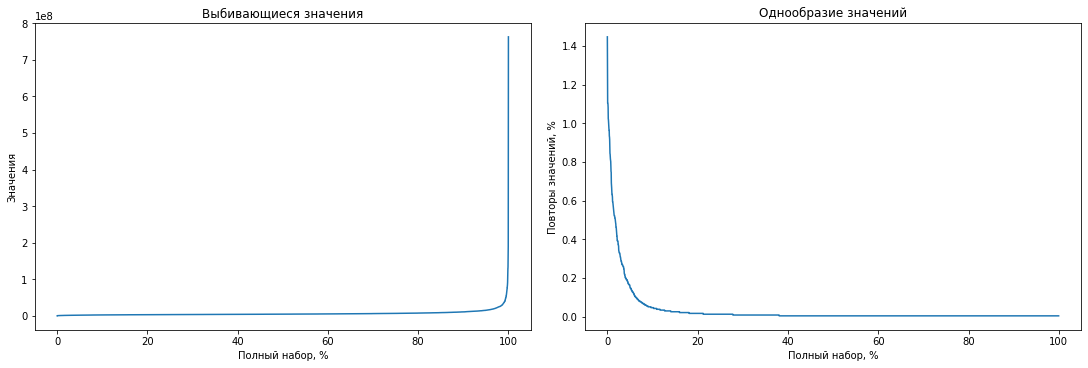

In [94]:
rare_out_plot(flats['last_price'])

In [95]:
flats['last_price'].describe()

count    2.355300e+04
mean     6.547000e+06
std      1.090582e+07
min      1.219000e+04
25%      3.440000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [96]:
flats['last_price'].quantile(0.99)

36000000.0

Квартиры стоимостью выше 36 млн составляют 1% от общего их числа. Поэтому могут быть удалены из рассмотрения на текущем этапе, как непредставительные

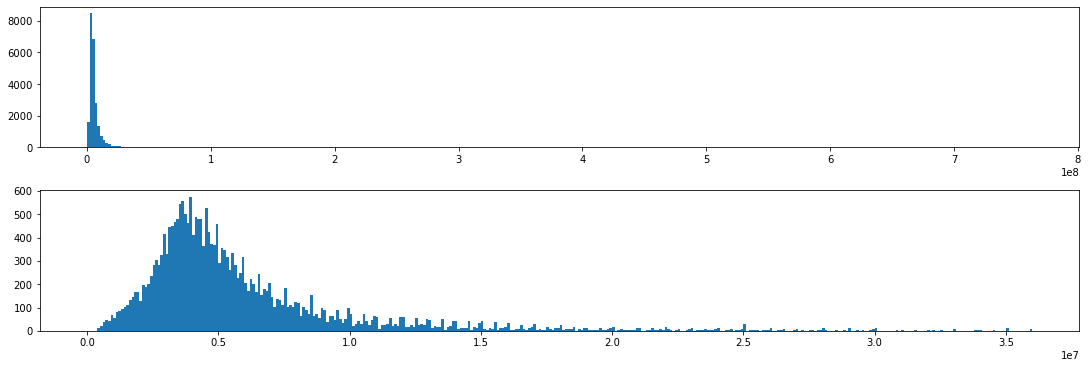

In [97]:
hists(flats['last_price'], 1, 360, [(0, 36000000)])

***Промежуточный итог***  
  
Цена квартиры 763 000 000 аномально высока. Отбросив 1% максимальных цен данные стали более показательными. На следующих этапах обработки данных исследование в этом направлении следует продолжить

**Число комнат**

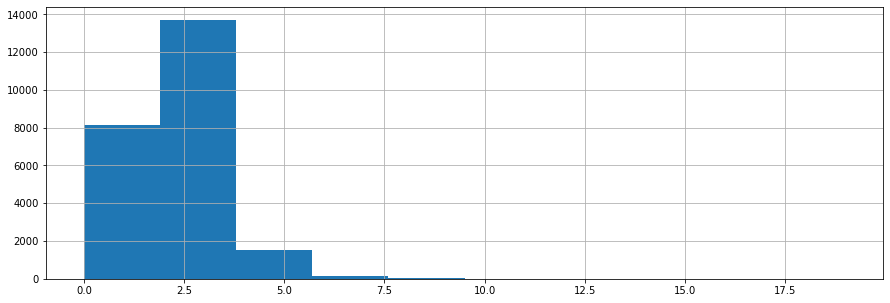

In [98]:
hists(flats['rooms'], 0)

In [99]:
flats['rooms'].describe()

count    23553.000000
mean         2.076296
std          1.074736
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [100]:
flats['rooms'].quantile(0.999)

8.0

Квартиры количеством комнат выше 8 составляют 0,1% от общего их числа. Поэтому могут быть удалены из рассмотрения на текущем этапе, как непредставительные

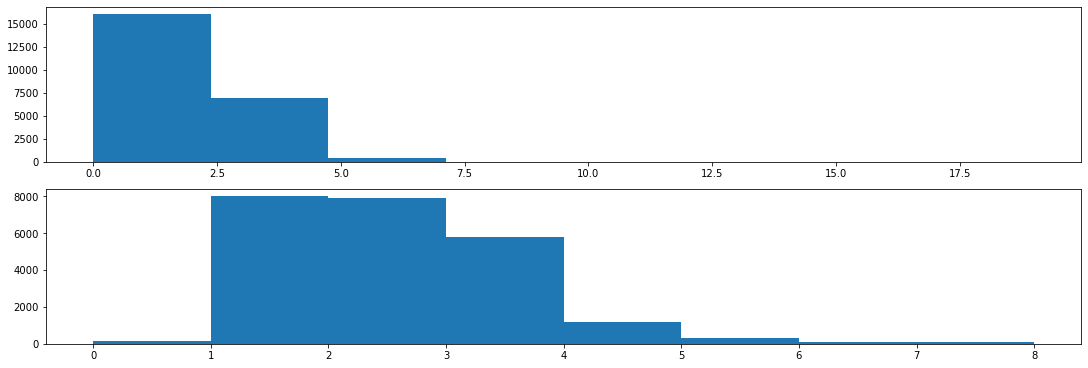

In [101]:
hists(flats['rooms'], 1, bins=8, ranges=[(0, 8)])

***Промежуточный итог***  
  
Ограничив рассмотрение количества комнат восмью стало наглядно видно, что основная масса кварир имеет от 2 до 4-х комнат, что соответствует ожидаемому результату.

**Высота потолков**

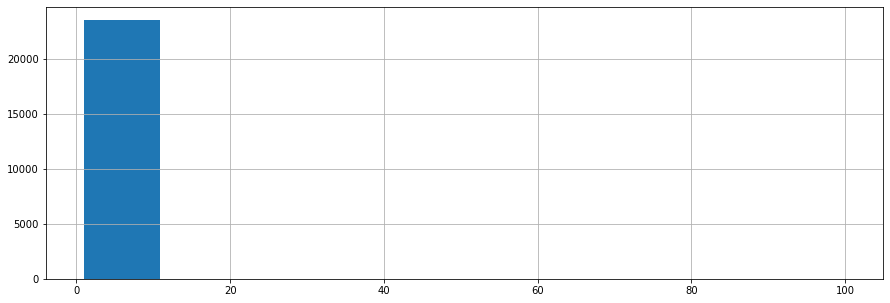

In [102]:
hists(flats['ceiling_height'], 0)

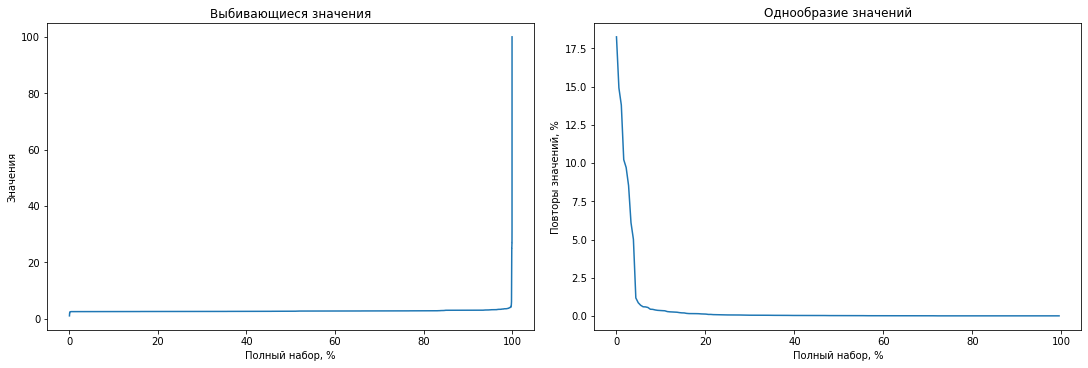

In [103]:
rare_out_plot(flats['ceiling_height'])

In [104]:
flats['ceiling_height'].describe()

count    23553.000000
mean         2.734908
std          0.984700
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

In [105]:
flats['ceiling_height'].quantile(0.01)

2.5

In [106]:
flats['ceiling_height'].quantile(0.99)

3.6

Высота птолков ниже 2,.5 м и выше 3.6 м в сумме составляют 2% от общего их числа. Поэтому могут быть удалены из рассмотрения на текущем этапе, как непредставительные

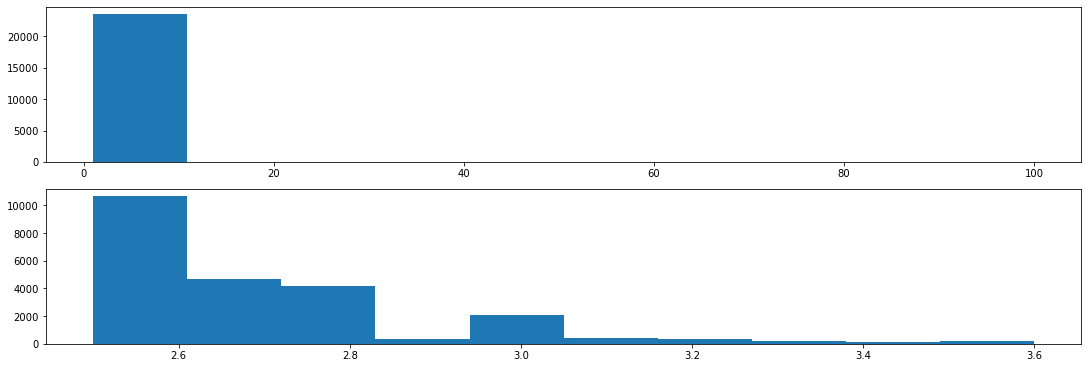

In [107]:
hists(flats['ceiling_height'], 1, bins=10, ranges=[(2.5, 3.6)])

***Промежуточный итог***  
  
Ограничив рассмотрение высоты потолков от 2.5 до 3.6 м стало наглядно видно, что основная масса кварир имеет потолки от 2.6 м до 2.8 м, что соответствует ожидаемому результату.

**Изучить время продажи квартиры; построить гистограмму; посчитать среднее и медиану; выяснить, сколько времени обычно занимает продажа; определить когда можно считать, что продажи прошли очень быстро, а когда необычно долго**

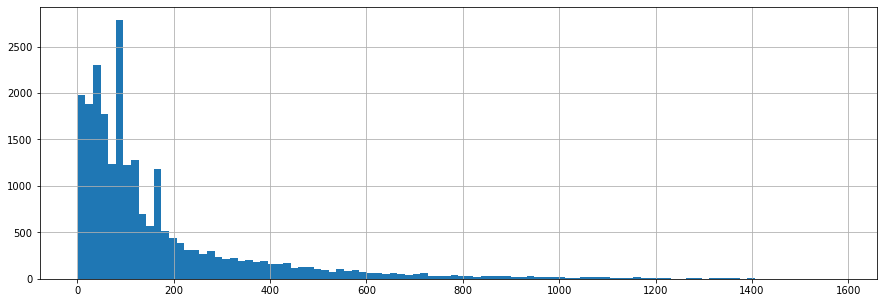

In [108]:
hists(flats['days_exposition'], 0, bins=100)

In [109]:
flats['days_exposition'].describe()

count    23553.000000
mean       171.231138
std        206.337261
min          1.000000
25%         45.000000
50%         94.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [110]:
flats['days_exposition'].median()

94.0

***Промежуточный итог***

Среднее: 171.231138.  
Медиана: 94  
  
Обычно, в среднем, продажа квартиры занимет 3 месяца. Если продажа квартиры длилась менее 45 дней -- продажа прошла очень быстро. Если продажа квартиры длилась более 200 дней -- продажа прошла необычайно долго.

**Убрать редкие и выбивающиеся значения**

*_Редкими_* будем считать значения, суммарное процентное вхождение которых в набор данных не превышает некоторого значения (по умолчанию -- 1%).  
*_Выбивающимися_*, в общем случае, будем считать значения, попадающие в группу по некторому квантилю (по умолчанию -- 0.99, в некоторых случаях -- 0.999), т.е максимальные значения, сумма процентов вхождений в набор данных которых равна некоторому значению (по умолчанию -- 1%). 

In [111]:
# Размеры набора данных до очистки от редких и выбивающихся значений
df_dim_before = flats.shape

**Столбец _total_images_**

In [112]:
flats['total_images'].describe()

count    23553.000000
mean         9.880695
std          5.680817
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

Выбивающихся значений нет

In [113]:
value_counts_percent(flats['total_images'])

    count   percent
10   1781  7.561669
9    1718  7.294188
20   1693  7.188044
8    1580  6.708275
7    1512  6.419564
6    1478  6.275209
11   1360  5.774211
5    1277  5.421815
12   1222  5.188299
0    1044  4.432556
13   1011  4.292447
14    984  4.177812
4     966  4.101388
15    946  4.016473
1     859  3.647094
3     761  3.231011
16    759  3.222519
17    649  2.755488
18    640  2.717276
2     637  2.704539
19    602  2.555938
23     16  0.067932
21     11  0.046703
24      8  0.033966
22      8  0.033966
26      5  0.021229
28      4  0.016983
32      4  0.016983
50      3  0.012737
29      3  0.012737
31      2  0.008491
35      2  0.008491
30      2  0.008491
27      2  0.008491
37      1  0.004246
39      1  0.004246
25      1  0.004246
42      1  0.004246


In [114]:
cut_value_counts_percent(flats['total_images'], 1)

    count   percent
10   1781  7.561669
9    1718  7.294188
20   1693  7.188044
8    1580  6.708275
7    1512  6.419564
6    1478  6.275209
11   1360  5.774211
5    1277  5.421815
12   1222  5.188299
0    1044  4.432556
13   1011  4.292447
14    984  4.177812
4     966  4.101388
15    946  4.016473
1     859  3.647094
3     761  3.231011
16    759  3.222519
17    649  2.755488
18    640  2.717276
2     637  2.704539
19    602  2.555938


Редкие значения укладываются в 1% всех значений столбца. Удалим их

In [115]:
drop_rare_out_values(flats['total_images'], quantile=NONE)

[9.0, 9.0]

**Столбец _last_price_**

In [116]:
flats['last_price'].describe()

count    2.347900e+04
mean     6.536433e+06
std      1.091319e+07
min      1.219000e+04
25%      3.429000e+06
50%      4.650000e+06
75%      6.775000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [117]:
flats['last_price'].quantile(0.97)

20000000.0

Поскольку мы исследуем массовый рынок по продаже квартир, будем считать выбивающимися значениями цены квартир более 20 млн. Удалим из набора эти квартиры

In [118]:
drop_rare_out_values(flats['last_price'], quantile=0.97, cut_percent=NONE)

[4650000.0, 4650000.0]

In [119]:
value_counts_percent(flats['last_price'])

          count   percent
4500000     340  1.493455
3500000     290  1.273829
4300000     260  1.142054
4000000     260  1.142054
4200000     259  1.137661
...         ...       ...
3935000       1  0.004393
4148000       1  0.004393
9735000       1  0.004393
2182000       1  0.004393
12288000      1  0.004393

[2558 rows x 2 columns]


Разброс цен очень широкий, поэтому выбрать редкие значения не предоставляется возможным

**Столбец _total_area_**

In [120]:
flats['total_area'].describe()

count    22766.000000
mean        56.695058
std         24.557723
min         12.000000
25%         40.000000
50%         51.000000
75%         67.000000
max        320.000000
Name: total_area, dtype: float64

In [121]:
flats['total_area'].quantile(0.985)

132.0

Квартиры в новостройках зачастую имеют площадь более 120 кв.м. Поэтому будем считать выбивающимися значения квантиля 0.985 (1,5% от общего числа квартир). Удалим из набора эти квартиры

In [122]:
drop_rare_out_values(flats['total_area'], quantile=0.985, cut_percent=NONE)

[51.0, 51.0]

In [123]:
value_counts_percent(flats['total_area'])

       count   percent
45.00    418  1.864324
42.00    383  1.708220
60.00    347  1.547656
31.00    345  1.538736
44.00    344  1.534276
...      ...       ...
26.05      1  0.004460
59.45      1  0.004460
58.54      1  0.004460
92.90      1  0.004460
78.96      1  0.004460

[1716 rows x 2 columns]


Разброс площадей квартир очень широкий, поэтому выбрать редкие значения не предоставляется возможным

**Столбец _first_day_exposition_**

In [124]:
flats['first_day_exposition'].describe()

count                   22421
unique                   1482
top       2018-02-01T00:00:00
freq                      343
Name: first_day_exposition, dtype: object

In [125]:
flats['first_day_exposition'].min()

'2014-11-27T00:00:00'

In [126]:
flats['first_day_exposition'].max()

'2019-05-03T00:00:00'

In [127]:
value_counts_percent(flats['first_day_exposition'])

                     count   percent
2018-02-01T00:00:00    343  1.529816
2017-11-10T00:00:00    211  0.941082
2017-10-13T00:00:00    120  0.535213
2017-09-27T00:00:00     96  0.428170
2018-03-26T00:00:00     90  0.401409
...                    ...       ...
2016-08-21T00:00:00      1  0.004460
2016-12-29T00:00:00      1  0.004460
2015-06-08T00:00:00      1  0.004460
2015-04-19T00:00:00      1  0.004460
2016-08-24T00:00:00      1  0.004460

[1482 rows x 2 columns]


Выбивающихся значений нет. Разброс дат очень широкий, поэтому выбрать редкие значения не предоставляется возможным

**Столбец _rooms_**

In [128]:
flats['rooms'].describe()

count    22421.000000
mean         1.974176
std          0.919946
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

Выбивающихся значений нет

In [129]:
value_counts_percent(flats['rooms'])

   count    percent
1   7991  35.640694
2   7811  34.837875
3   5454  24.325409
4    882   3.933812
0    135   0.602114
5    130   0.579814
6     16   0.071362
7      2   0.008920


In [130]:
cut_value_counts_percent(flats['rooms'], 0.5)

   count    percent
1   7991  35.640694
2   7811  34.837875
3   5454  24.325409
4    882   3.933812
0    135   0.602114
5    130   0.579814


Редкими являются квартиры с 6-ю и 7-ю комнатами. Удалим их из набора данных

In [131]:
drop_rare_out_values(flats['rooms'], quantile=NONE, cut_percent=0.5)

[2.0, 2.0]

**Столбец _floors_total_**

In [132]:
flats['floors_total'].describe()

count    22403.000000
mean        10.760300
std          6.627476
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [133]:
value_counts_percent(flats['floors_total'])

    count    percent
5    5560  24.818105
9    3697  16.502254
16   1319   5.887604
12   1312   5.856359
10   1125   5.021649
4    1096   4.892202
25   1041   4.646699
17    808   3.606660
6     741   3.307593
3     622   2.776414
14    541   2.414855
7     485   2.164889
18    483   2.155961
24    455   2.030978
2     362   1.615855
15    344   1.535509
23    343   1.531045
19    324   1.446235
8     301   1.343570
22    279   1.245369
20    253   1.129313
13    213   0.950766
11    184   0.821319
27    163   0.727581
21    153   0.682944
26    122   0.544570
1      25   0.111592
35     23   0.102665
28     21   0.093737
36      3   0.013391
52      1   0.004464
37      1   0.004464
34      1   0.004464
60      1   0.004464
29      1   0.004464


In [134]:
cut_value_counts_percent(flats['floors_total'], 0.5)

    count    percent
5    5560  24.818105
9    3697  16.502254
16   1319   5.887604
12   1312   5.856359
10   1125   5.021649
4    1096   4.892202
25   1041   4.646699
17    808   3.606660
6     741   3.307593
3     622   2.776414
14    541   2.414855
7     485   2.164889
18    483   2.155961
24    455   2.030978
2     362   1.615855
15    344   1.535509
23    343   1.531045
19    324   1.446235
8     301   1.343570
22    279   1.245369
20    253   1.129313
13    213   0.950766
11    184   0.821319
27    163   0.727581
21    153   0.682944
26    122   0.544570


In [135]:
tmp_df = cut_value_counts_percent(flats['floors_total'], 0.5, ret=True)
tmp_df.index.max()

27

In [136]:
flats['floors_total'].quantile(0.995)

27.0

Хотя cредняя этажность новостроек в С.Пб -- 14,6 (https://yandex.ru/turbo?text=https%3A%2F%2Fwww.forbes.ru%2Fbiznes%2F371755-kak-rastut-goroda-etazhnost-rossiyskih-gorodov-vyrosla-v-dva-raza-za-tri-desyatiletiya), редкие и выбивающиеся значения в нашем наборе данных ограничены 27 этажами. Удалим их

In [137]:
drop_rare_out_values(flats['floors_total'], quantile=NONE, cut_percent=0.5)

[9.0, 9.0]

In [138]:
value_counts_percent(flats['floors_total'])

    count    percent
5    5560  24.903700
9    3697  16.559169
16   1319   5.907910
12   1312   5.876556
10   1125   5.038968
4    1096   4.909075
25   1041   4.662725
17    808   3.619099
6     741   3.319000
3     622   2.785989
14    541   2.423184
7     485   2.172355
18    483   2.163397
24    455   2.037983
2     362   1.621428
15    344   1.540804
23    343   1.536325
19    324   1.451223
8     301   1.348204
22    279   1.249664
20    253   1.133208
13    213   0.954045
11    184   0.824151
27    163   0.730090
21    153   0.685300
26    122   0.546448


**Столбец _ceiling_height_**

In [139]:
flats['ceiling_height'].describe()

count    22326.000000
mean         2.717840
std          0.988248
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

In [140]:
flats['ceiling_height'].quantile(0.97)

3.2

Стандартная высота потолков составляет от 2,5 до 3,2 м (https://www.ivd.ru/stroitelstvo-i-remont/potolok/standartnaya-vysota-potolkov-v-kvartire-kakoj-ona-byvaet-i-kak-ee-izmenit-42011) Удалим выбивающиеся значения по квантилю 0.97

In [141]:
drop_rare_out_values(flats['ceiling_height'], quantile=0.97, cut_percent=NONE)

[2.65, 2.65]

In [142]:
tmp_df = cut_value_counts_percent(flats['ceiling_height'], 1, ret=True)
tmp_df.index.max()

3.15

Удалим редкие значения, суммарное количество которых не превышает 1% от общего числа значений

In [143]:
drop_rare_out_values(flats['ceiling_height'], quantile=NONE)

[2.65, 2.65]

In [144]:
value_counts_percent(flats['ceiling_height'])

      count    percent
2.55   4205  19.691861
2.50   3494  16.362274
2.70   3143  14.718554
2.75   2349  11.000281
2.60   2246  10.517936
3.00   1713   8.021916
2.80   1328   6.218975
2.65   1154   5.404140
3.10    165   0.772689
2.90    147   0.688396
2.56    138   0.646249
2.57    101   0.472979
2.85     95   0.444882
2.66     86   0.402735
2.54     83   0.388686
2.64     81   0.379320
2.52     79   0.369954
2.53     67   0.313759
2.58     62   0.290344
2.76     60   0.280978
2.77     59   0.276295
2.78     50   0.234148
3.15     48   0.224782
2.95     40   0.187319
3.05     38   0.177953
2.67     36   0.168587
2.51     34   0.159221
2.73     32   0.149855
2.72     30   0.140489
2.74     27   0.126440
2.40     23   0.107708
2.68     22   0.103025
2.84     19   0.088976
2.82     18   0.084293
2.45     14   0.065561
2.59     14   0.065561
3.12     14   0.065561
2.83     14   0.065561
2.62     13   0.060879
2.63     13   0.060879


Приведем высоту потолков к значениям из списка: \[2.50, 2.55, 2.60, 2.65, 2.70, 2.75, 2.80, 2.85, 2.90, 2.95, 3.00, 3.05, 3.10\]

In [145]:
std_ceils = [2.50, 2.55, 2.60, 2.65, 2.70, 2.75, 2.80, 2.85, 2.90, 2.95, 3.00, 3.05, 3.10]

def std_ceil(row):
    
    ceil = row['ceiling_height']
    deltas = []
    
    for i in std_ceils:
        deltas.append(abs(ceil - i))
        
    return std_ceils[deltas.index(min(deltas))]

In [146]:
flats['ceiling_height'] = flats.apply(std_ceil, axis=1)
flats['ceiling_height'].unique()

array([2.7 , 2.75, 2.55, 2.65, 2.5 , 3.  , 2.6 , 3.05, 2.8 , 2.9 , 2.85,
       3.1 , 2.95])

In [147]:
value_counts_percent(flats['ceiling_height'])

      count    percent
2.55   4594  21.513534
2.50   3644  17.064719
2.70   3195  14.962068
2.75   2527  11.833848
2.60   2335  10.934719
3.00   1713   8.021916
2.80   1396   6.537417
2.65   1370   6.415660
3.10    227   1.063033
2.90    147   0.688396
2.85    128   0.599419
2.95     40   0.187319
3.05     38   0.177953


**Столбец _living_area_**

In [148]:
flats['living_area'].describe()

count    21354.000000
mean        30.921016
std         13.562613
min          2.000000
25%         18.200000
50%         29.400000
75%         40.000000
max        100.000000
Name: living_area, dtype: float64

Выбивающиеся значения отсутствуют

In [149]:
value_counts_percent(flats['living_area'])

       count   percent
18.00    863  4.041397
17.00    826  3.868128
30.00    575  2.692704
32.00    496  2.322750
29.00    482  2.257188
...      ...       ...
18.03      1  0.004683
26.21      1  0.004683
34.14      1  0.004683
18.04      1  0.004683
15.55      1  0.004683

[1370 rows x 2 columns]


Разброс жилых площадей квартир очень широкий, поэтому выбрать редкие значения не предоставляется возможным

Жилая площадь не может превышать общей площади квартиры. Ранее мы сформировали столбец *living_total_areas_relation*, в котором записали соотношения жилой площади к общей площади квартиры

In [150]:
flats['living_total_areas_relation'].describe()

count    21354.000000
mean         0.563780
std          0.101612
min          0.038462
25%          0.496503
50%          0.568966
75%          0.631797
max          1.307692
Name: living_total_areas_relation, dtype: float64

In [151]:
flats['living_total_areas_relation'].quantile(0.99)

0.7857142857142857

Жилая площадь, занимающая 3/4 квартиры выглядит очень убедительно. Выбивающиеся значения укладываются в 1% от общего числа значений. Удалим их.

In [152]:
drop_rare_out_values(flats['living_total_areas_relation'], quantile=0.99, cut_percent=NONE)

[0.5689655172413793, 0.5689655172413793]

**Столбец _floor_**

In [153]:
flats['floor'].describe()

count    21136.000000
mean         5.968395
std          4.891599
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

In [154]:
flats['floors_total'].max()

27

In [155]:
value_counts_percent(flats['floors_total'])

    count    percent
5    5157  24.399129
9    3651  17.273846
12   1295   6.126987
16   1286   6.084406
10   1116   5.280091
25   1025   4.849546
4     908   4.295988
17    786   3.718774
6     548   2.592733
3     544   2.573808
14    527   2.493376
18    469   2.218963
24    446   2.110144
7     425   2.010787
23    337   1.594436
15    337   1.594436
2     332   1.570780
19    316   1.495079
8     286   1.353142
22    275   1.301098
20    250   1.182816
13    211   0.998297
11    178   0.842165
27    162   0.766465
21    148   0.700227
26    121   0.572483


Редких и выбивающихся значений нет

**Столбец _is_apartment_**

In [156]:
flats['is_apartment'].describe()

count     21136
unique        2
top       False
freq      21106
Name: is_apartment, dtype: object

Редких и выбивающихся значений нет

**Столбец _studio_**

In [157]:
flats['studio'].describe()

count     21136
unique        2
top       False
freq      21016
Name: studio, dtype: object

Редких и выбивающихся значений нет

**Столбец _open_plan_**

In [158]:
flats['open_plan'].describe()

count     21136
unique        2
top       False
freq      21130
Name: open_plan, dtype: object

Редких и выбивающихся значений нет

**Столбец _kitchen_area_**

In [159]:
flats['kitchen_area'].describe()

count    21136.000000
mean         9.742369
std          4.156023
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         64.000000
Name: kitchen_area, dtype: float64

Площадь кухни не может превышать общей площади квартиры. Ранее мы сформировали столбец *kitchen_total_areas_relation*, в котором записали соотношения площади кухни к общей площади квартиры

In [160]:
flats['kitchen_total_areas_relation'].describe()

count    21136.000000
mean         0.189907
std          0.069035
min          0.043524
25%          0.139344
50%          0.174094
75%          0.235294
max          0.739837
Name: kitchen_total_areas_relation, dtype: float64

In [161]:
flats.loc[flats['kitchen_area'] == 64,:]

,Unnamed: 0,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,total_area_grp,last_price_grp,square_meter_price,exposition_day,exposition_month,exposition_year,flat_floor,living_total_areas_relation,kitchen_total_areas_relation
15679,15780,9,12990000,119.6,2017-03-13T00:00:00,3,3.0,5,36.4,4,False,False,False,64.0,4,Пушкин,18616,30770,1,569,0,-1,161,10,10,108612.040134,13,3,2017,0,0.304348,0.535117
19375,19499,10,8000000,118.0,2017-08-31T00:00:00,3,3.0,5,36.0,4,False,False,False,64.0,4,Пушкин,18616,30770,1,569,0,-1,7,10,9,67796.610169,31,8,2017,0,0.305085,0.542373


Площадь кухни 64 кв.м, жилая 36 кв.м. Что ж, такое, наверное, возможно. Хотелось бы взглянуть на такую квартиру.  
  
Выбивающихся значений нет

In [162]:
value_counts_percent(flats['kitchen_area'])

       count   percent
10.00   1523  7.205715
6.00    1267  5.994512
9.00    1230  5.819455
8.00    1206  5.705905
7.00    1202  5.686980
...      ...       ...
4.30       1  0.004731
13.74      1  0.004731
5.82       1  0.004731
5.28       1  0.004731
9.38       1  0.004731

[830 rows x 2 columns]


Разброс жилых площадей кухонь очень широкий, поэтому выбрать редкие значения не предоставляется возможным

**Столбец _balcony_**

In [163]:
flats['balcony'].describe()

count    21136.000000
mean         0.608441
std          0.961267
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

In [164]:
value_counts_percent(flats['balcony'])

   count    percent
0  13374  63.275927
1   3848  18.205905
2   3424  16.199849
5    271   1.282173
4    152   0.719152
3     67   0.316995


Редких и выбивающихся значений нет

**Столбец _locality_name_**

In [165]:
flats['locality_name'].describe()

count               21094
unique                355
top       Санкт-Петербург
freq                13519
Name: locality_name, dtype: object

Редких и выбивающихся значений нет

**Столбец _airports_nearest_**

In [166]:
flats['airports_nearest'].describe()

count    21136.000000
mean     21843.666493
std      16914.459201
min         -1.000000
25%         -1.000000
50%      20895.000000
75%      35197.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [167]:
value_counts_percent(flats['airports_nearest'])

        count    percent
-1       5293  25.042581
 37434     34   0.160863
 21928     30   0.141938
 44870     29   0.137207
 39946     26   0.123013
...       ...        ...
 45306      1   0.004731
 17134      1   0.004731
 25322      1   0.004731
 35559      1   0.004731
 51230      1   0.004731

[7398 rows x 2 columns]


Четверть квартир не расположены рядом с аэропортом. Хотя расстояние в 84 км трудно считать близким расположением.  
  
Выбивающихся значений нет, разброс расстояний до аэропортов очень широкий, поэтому выбрать редкие значения не предоставляется возможным

**Столбец _city_centers_nearest_**

In [168]:
flats['city_centers_nearest'].describe()

count    21136.000000
mean     11266.517553
std       9753.282642
min         -1.000000
25%        666.500000
50%      11791.000000
75%      15541.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [169]:
value_counts_percent(flats['city_centers_nearest'])

        count    percent
-1       5276  24.962150
 8460      34   0.160863
 20802     30   0.141938
 10720     26   0.123013
 8370      24   0.113550
...       ...        ...
 9948       1   0.004731
 30438      1   0.004731
 32487      1   0.004731
 5866       1   0.004731
 32768      1   0.004731

[6819 rows x 2 columns]


Четверть квартир не расположены рядом с городскими центрами. Хотя расстояние в 65 км трудно считать близким расположением.  
  
Выбивающихся значений нет, разброс расстояний до аэропортов очень широкий, поэтому выбрать редкие значения не предоставляется возможным

**Столбец _parks_around_3000_**

In [170]:
flats['parks_around_3000'].describe()

count    21136.000000
mean         0.411289
std          0.692918
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

In [171]:
value_counts_percent(flats['parks_around_3000'])

   count    percent
0  14556  68.868282
1   4869  23.036525
2   1309   6.193225
3    402   1.901968


Редких и выбивающихся значений нет

**Столбец _parks_nearest_**

In [172]:
flats['parks_nearest'].describe()

count    21136.000000
mean       155.390992
std        302.593646
min         -1.000000
25%         -1.000000
50%         -1.000000
75%        252.000000
max       3190.000000
Name: parks_nearest, dtype: float64

In [173]:
value_counts_percent(flats['parks_nearest'])

      count    percent
-1    14553  68.854088
 392     38   0.179788
 441     38   0.179788
 173     32   0.151400
 456     31   0.146669
...     ...        ...
 625      1   0.004731
 861      1   0.004731
 917      1   0.004731
 168      1   0.004731
 3        1   0.004731

[956 rows x 2 columns]


Только у чуть более 30% квартир есть на допустимом удалении парк.  
Выбивающихся значений нет, разброс расстояний до парков очень широкий, поэтому выбрать редкие значения не предоставляется возможным

**Столбец _ponds_around_3000_**

In [174]:
flats['ponds_around_3000'].describe()

count    21136.000000
mean         0.528530
std          0.828257
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

In [175]:
value_counts_percent(flats['ponds_around_3000'])

   count    percent
0  13562  64.165405
1   4996  23.637396
2   1559   7.376041
3   1019   4.821158


Редких и выбивающихся значений нет

**Столбец _ponds_nearest_**

In [176]:
flats['ponds_nearest'].describe()

count    21136.000000
mean       190.393263
std        304.465428
min         -1.000000
25%         -1.000000
50%         -1.000000
75%        366.000000
max       1344.000000
Name: ponds_nearest, dtype: float64

In [177]:
value_counts_percent(flats['ponds_nearest'])

       count    percent
-1     13562  64.165405
 427      42   0.198713
 433      38   0.179788
 564      33   0.156132
 454      32   0.151400
...      ...        ...
 994       1   0.004731
 625       1   0.004731
 1066      1   0.004731
 1082      1   0.004731
 977       1   0.004731

[1070 rows x 2 columns]


Только у чуть более 1/3 квартир есть на допустимом удалении водоём.  
Выбивающихся значений нет, разброс расстояний до водоёмов очень широкий, поэтому выбрать редкие значения не предоставляется возможным

**Столбец _days_exposition_**

In [178]:
flats['days_exposition'].describe()

count    21136.000000
mean       164.957135
std        200.357037
min          1.000000
25%         45.000000
50%         92.000000
75%        193.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [179]:
flats['days_exposition'].quantile(0.97)

724.0

Ограничим возраст объявления 2-мя годами. Удалим 3% выбивающихся значений

In [180]:
drop_rare_out_values(flats['days_exposition'], quantile=0.97, cut_percent=NONE)

[92.0, 92.0]

In [181]:
value_counts_percent(flats['days_exposition'])

     count   percent
45     837  4.083126
92     717  3.497732
60     513  2.502561
118    402  1.961071
99     369  1.800088
..     ...       ...
709      1  0.004878
693      1  0.004878
696      1  0.004878
634      1  0.004878
657      1  0.004878

[712 rows x 2 columns]


Разброс возрастов объявлений очень широкий, поэтому выбрать редкие значения не предоставляется возможным

**Столбец _total_area_grp_**

Столбец группового деления. Обработки не требует

**Столбец _last_price_grp_**

Столбец группового деления. Обработки не требует

**Столбец _square_meter_price_**

Производный столбец. Обработки не требует. Обработки требуют столбцы, формирующие значения данного

**Столбец _exposition_day_**

День даты подачи объявления. Обработки не требует

**Столбец _exposition_month_**

Месяц даты подачи объявления. Обработки не требует

**Столбец _exposition_year_**

Год даты подачи объявления. Обработки не требует

**Столбец _flat_floor_**

Столбец группового деления. Обработки не требует

**Столбец _living_total_areas_relation_**

Производный столбец. Обработки не требует. Обработки требуют столбцы,формирующие значения данного

**Столбец _kitchen_total_areas_relation_**

Производный столбец. Обработки не требует. Обработки требуют столбцы, формирующие значения данного

In [182]:
# Процент удаленных значений
100 - (flats.shape[0] / df_dim_before[0] *100)

12.966501082664621

***Промежуточный итог***  
  
Выбивающиеся и редкие значения удалены. Размер набора данных уменьшился на 12.97% -- не так мало, как бы хотелось, но будем считать, что до 15% это вполне допустимо.  
  
Без изменения остались столбцы: *first_day_exposition*, *floor*, *is_apartment*, *studio*, *open_plan*, *kitchen_area*, *balcony*, *locality_name*, *airports_nearest*, *city_centers_nearest*, *parks_around_3000*, *parks_nearest*, *ponds_around_3000*, *ponds_nearest*, *total_area_grp*, *last_price_grp*, *square_meter_price*, *exposition_day*, *exposition_month*, *exposition_year*, *flat_floor*, *living_total_areas_relation*, *kitchen_total_areas_relation*.  
  
Выбивающиеся значения были удалены в столбцах: *last_price*, *total_area*, *living_area*, *days_exposition*.

Редкие значения были удалены в столбцах: *total_images*, *rooms*
  
Выбивающиеся и редкие значения были удалены в столбцах: *floors_total*, *ceiling_height*

**Определить, какие факторы больше всего влияют на стоимость квартиры; изучить, как зависит цена от квадратного метра, числа комнат, удалённости от центра; изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом, зависимость от даты размещения: дня недели, месяца и года**

In [183]:
flats.corr()['last_price'].sort_values(ascending=False)

last_price                      1.000000
last_price_grp                  0.888721
total_area                      0.738426
square_meter_price              0.678867
total_area_grp                  0.666493
living_area                     0.609825
kitchen_area                    0.555790
rooms                           0.439969
ceiling_height                  0.357541
airports_nearest                0.309782
ponds_around_3000               0.282619
parks_around_3000               0.250938
parks_nearest                   0.244557
ponds_nearest                   0.192164
floors_total                    0.191009
total_images                    0.163443
floor                           0.133254
balcony                         0.085491
city_centers_nearest            0.077578
days_exposition                 0.072164
flat_floor                      0.038537
living_total_areas_relation     0.010376
exposition_year                 0.005995
exposition_month                0.005036
exposition_day  

***Промежуточный итог***  
  
Больше всего на стоимость квартиры влияет её полная площадь и все зависимые от нее (площади) характеристики квартиры -- жилая площадь, площадь кухни, количество комнат.  
Зависимость стоимости квартиры от цены на квадратный метр -- выше среднего.  
Зависимость стоимости квартиры от количества комнат -- ниже среднего.  
Зависимость стоимости квартиры от удаленности от центра -- низкая.  
Зависимость стоимости квартиры от этажа квартиры -- низкая.  
Зависимость стоимости квартиры от даты (день, месяц, год) размещения объявления о продаже -- пренебрежительно мала

**Выбрать 10 населённых пунктов с наибольшим числом объявлений; посчитать среднюю цену квадратного метра в этих населённых пунктах; выделить населённые пункты с самой высокой и низкой стоимостью жилья**

In [184]:
pt = flats.pivot_table(index='locality_name', values='last_price', aggfunc='count')
pt.columns = ['count']
pt.sort_values(by='count', ascending=False, inplace=True)
top10 = pt.head(10)
print(top10)

                   count
locality_name           
Санкт-Петербург    13109
посёлок Мурино       484
посёлок Шушары       422
Всеволожск           369
Пушкин               324
Колпино              321
посёлок Парголово    308
Гатчина              281
деревня Кудрово      259
Выборг               208


In [185]:
names_top10 = top10.index
names_top10

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object', name='locality_name')

In [186]:
tmp_df_data = []

for i in names_top10:
    tmp_df_data.append(
    [
        i,
        (flats.loc[flats['locality_name'] == i, 'square_meter_price'].sum() / 
         flats.loc[flats['locality_name'] == i, 'square_meter_price'].count())
    ])
    
tmp_df = pd.DataFrame(columns=['locality_name', 'square_meter_price_mean'], data=tmp_df_data)
tmp_df.sort_values(by='square_meter_price_mean', ascending=False).reset_index(drop=True)

,locality_name,square_meter_price_mean
0,Санкт-Петербург,108079.147141
1,Пушкин,101350.337477
2,деревня Кудрово,92198.808421
3,посёлок Парголово,90235.745774
4,посёлок Мурино,85577.654560
5,посёлок Шушары,78472.758927
6,Колпино,75405.780498
7,Гатчина,68934.902761
8,Всеволожск,67213.368523
9,Выборг,57987.390009


***Промежуточный итог***  
  
Десять населеннызх пунктов с самой дорогой жилой недвижимостью выделены, средние цены квадратного метра для них посчитаны.  
Наиболее дорогая недвижимость, ожидаемо, в Санкт-Петербурге.  
Наименее дорогая недвижимость в Выборге

**Выделить квартиры в Санкт-Петербурге; выяснить, какая область входит в центр -- создать столбец с расстоянием до центра в километрах: округлить до целых значений, посчитать среднюю цену для каждого километра, построить график: он должен показывать, как цена зависит от удалённости от центра**

In [187]:
import math

In [188]:
def zones_ceiling(row):
    value = row['city_centers_nearest']
    return math.ceil(value / 1000)

In [189]:
spb = flats.loc[flats['locality_name'] == names_top10[0],:]
spb['city_centers_zones'] = spb.apply(zones_ceiling, axis=1)

<ipython-input-189-77b464c0b4d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb['city_centers_zones'] = spb.apply(zones_ceiling, axis=1)


In [190]:
zones = spb['city_centers_zones'].unique()
zones

array([17, 14, 12, 16, 15, 11, 13, 10,  3,  5,  9,  0,  8,  7,  6, 22, 18,
        4,  2, 25, 26, 24, 23, 19, 21, 29, 20,  1, 28, 30, 27],
      dtype=int64)

In [191]:
tmp_df_data = []

for i in zones:
    tmp_df_data.append(
    [
        i,
        (spb.loc[spb['city_centers_zones'] == i, 'square_meter_price'].sum() / 
         spb.loc[spb['city_centers_zones'] == i, 'square_meter_price'].count())
    ])
    
tmp_df = pd.DataFrame(columns=['city_centers_zones', 'zones_square_meter_price'], data=tmp_df_data)
tmp_df = tmp_df.sort_values(by='city_centers_zones').reset_index(drop=True)
tmp_df = tmp_df.loc[:, 'zones_square_meter_price']
tmp_df

0     126478.993912
1     119097.074030
2     130133.005788
3     117028.955602
4     119166.323505
5     130307.306823
6     129415.002174
7     128282.113398
8     124430.906785
9     115793.552486
10    109101.697703
11    109348.079947
12    105317.720942
13    108136.826300
14    106813.109149
15    104541.128119
16    101726.098986
17     99191.361521
18     95699.006284
19     95271.179029
20     95505.097638
21    102305.967099
22     91053.609337
23     87971.354822
24     91385.690165
25     82440.343912
26     90732.298654
27     85899.758454
28     70312.500000
29     82057.341826
30     56976.744186
Name: zones_square_meter_price, dtype: float64

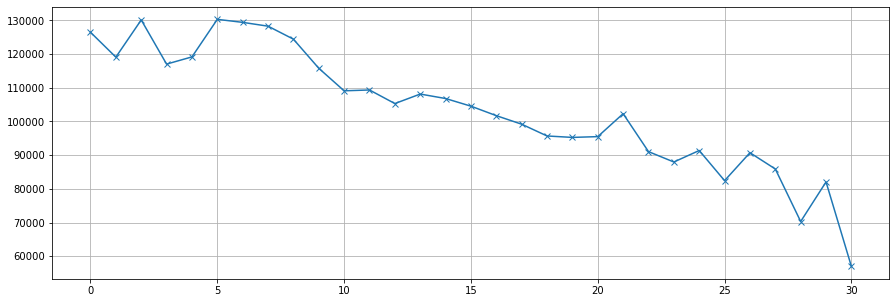

In [192]:
tmp_df.plot(grid=True, figsize=(15,5), style='x-')

In [193]:
print(tmp_df[4])
print(tmp_df[9])

119166.32350541228
115793.55248604353


***Промежуточный итог***  
  
Выделены квартиры в Санкт-Петербурге. Создан столбец с расстоянием до центра в километрах, округленный до целых значений.  Посчитана средняя цена для каждого километра. Построен график, показывающий, как цена зависит от удалённости от центра.  
Центром будем считать область, входящую в зону с удалением от центра не более 9 км -- после данной удаленности цена неуклонно снижается.

**Выделить сегмент квартир в центре; проанализировать эту территорию и изучить следующие параметры: площадь, цена, число комнат, высота потолков; также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)**

In [194]:
spb_center = spb.loc[spb['city_centers_zones'] <= 9, :]

**Площадь квартир**

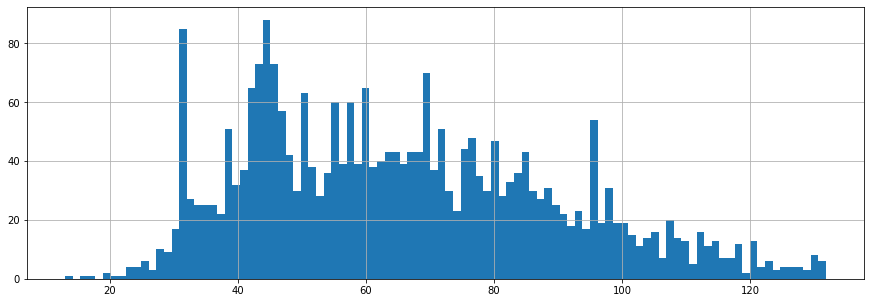

In [195]:
hists(spb_center['total_area'], 0, bins=100)

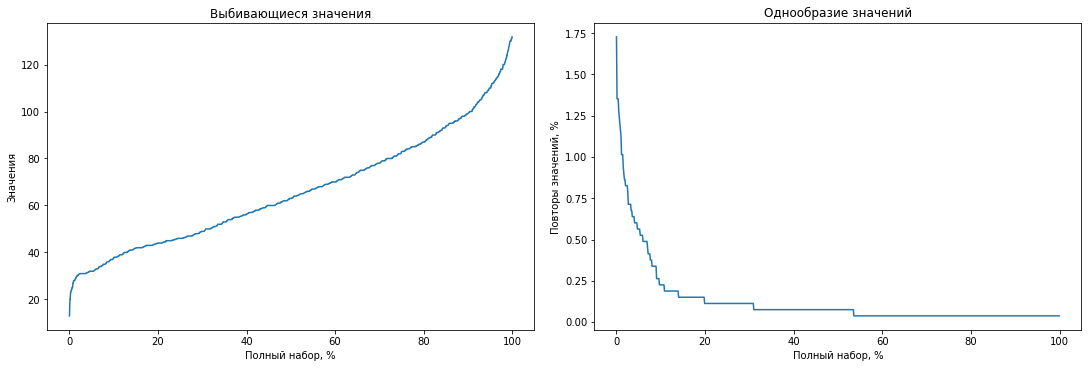

In [196]:
rare_out_plot(spb_center['total_area'])

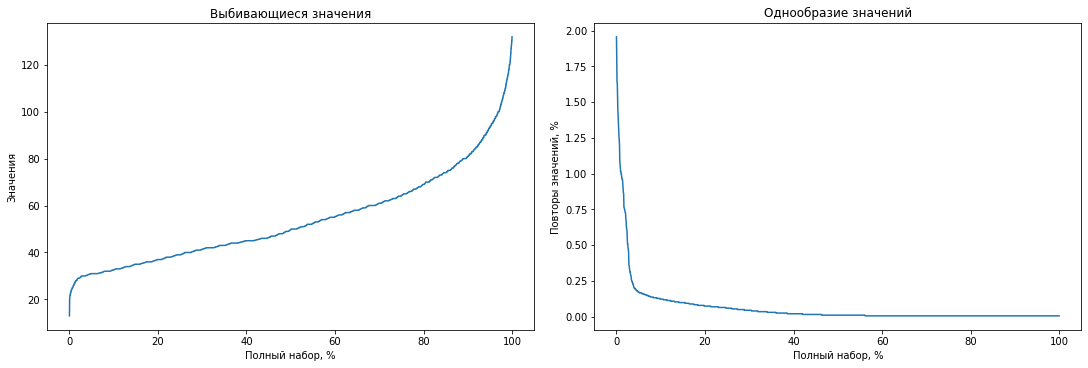

In [197]:
rare_out_plot(flats['total_area'])

In [198]:
spb_center['total_area'].describe()

count    2662.000000
mean       65.982735
std        23.836184
min        13.000000
25%        46.000000
50%        63.000000
75%        82.750000
max       131.800000
Name: total_area, dtype: float64

***Промежуточный итог***  
  
Квартиры в центре имеют, в большинсте случаев, площадь от 40 кв.м. до 120 кв.м., при этом вариантов площадей в этом диапазоне большое множество. Иными словами, квартиры в центре имеют такие же площади, как все квартиры в целом.

**Цена квартир**

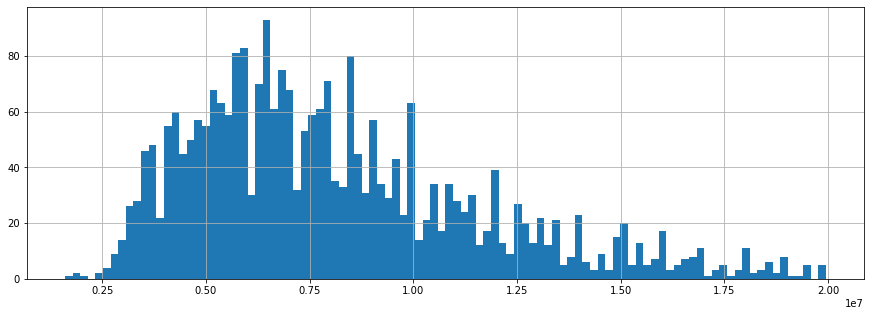

In [199]:
hists(spb_center['last_price'], 0, bins=100)

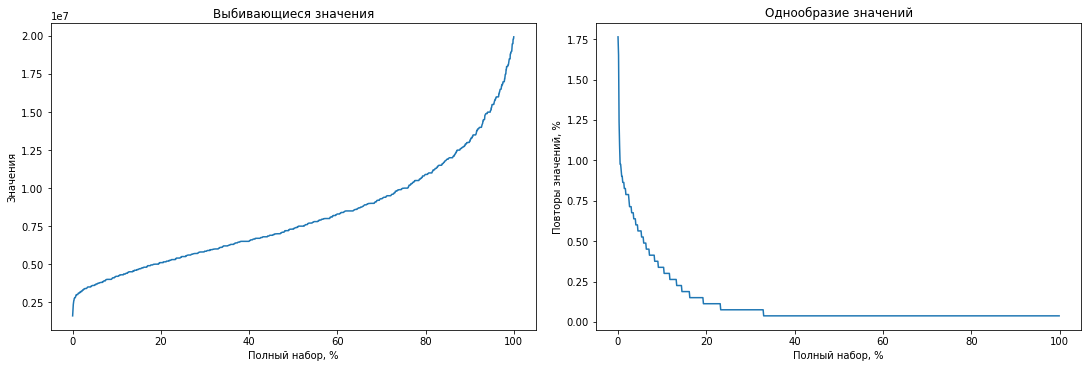

In [200]:
rare_out_plot(spb_center['last_price'])

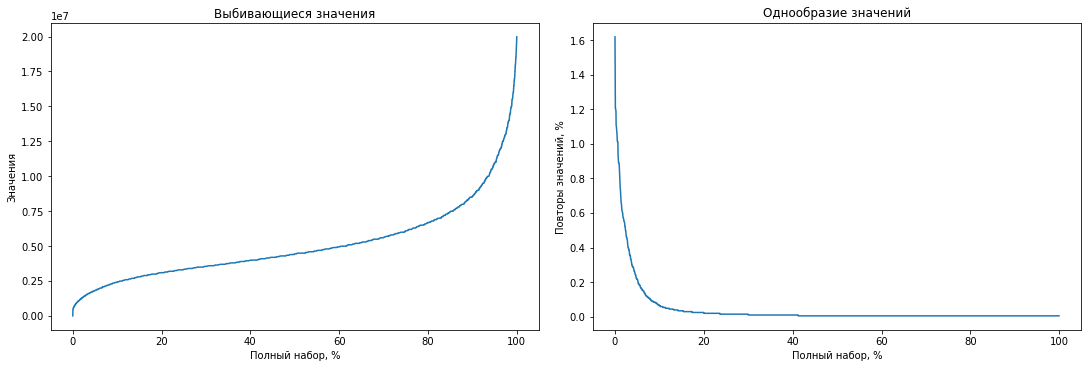

In [201]:
rare_out_plot(flats['last_price'])

In [202]:
spb_center['last_price'].describe()

count    2.662000e+03
mean     8.095929e+06
std      3.529581e+06
min      1.600000e+06
25%      5.500000e+06
50%      7.300000e+06
75%      9.990000e+06
max      1.995000e+07
Name: last_price, dtype: float64

***Промежуточный итог***  
  
Квартиры в центре по цене занимают второую половину диапазона цен всех квартир, при этом вариантов цен в этом диапазоне большое множество

**Число комнат**

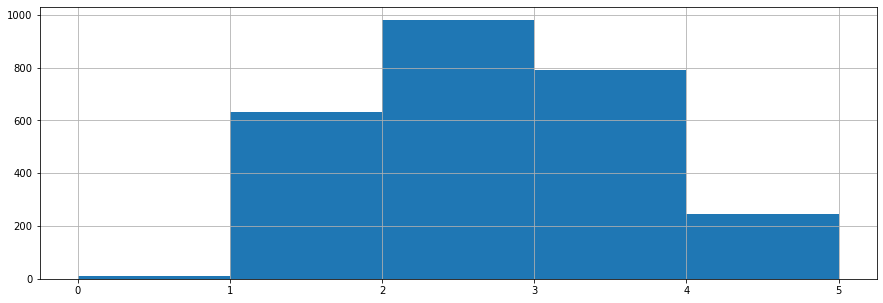

In [203]:
hists(spb_center['rooms'], 0, bins=5)

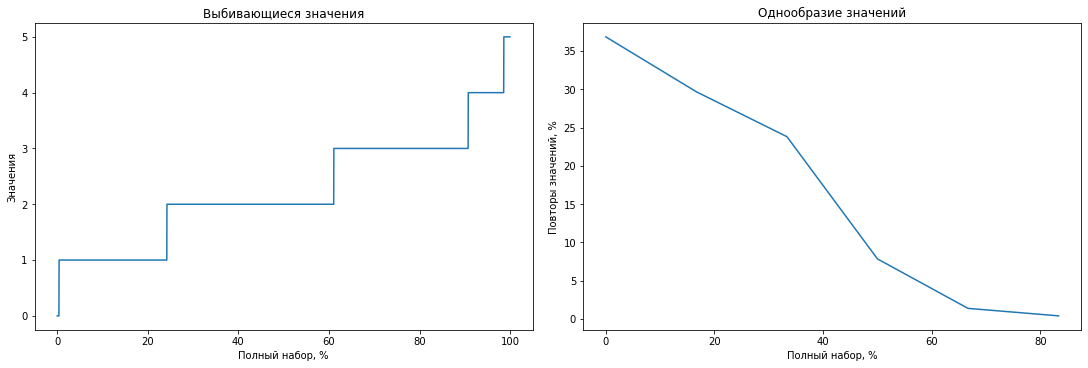

In [204]:
rare_out_plot(spb_center['rooms'])

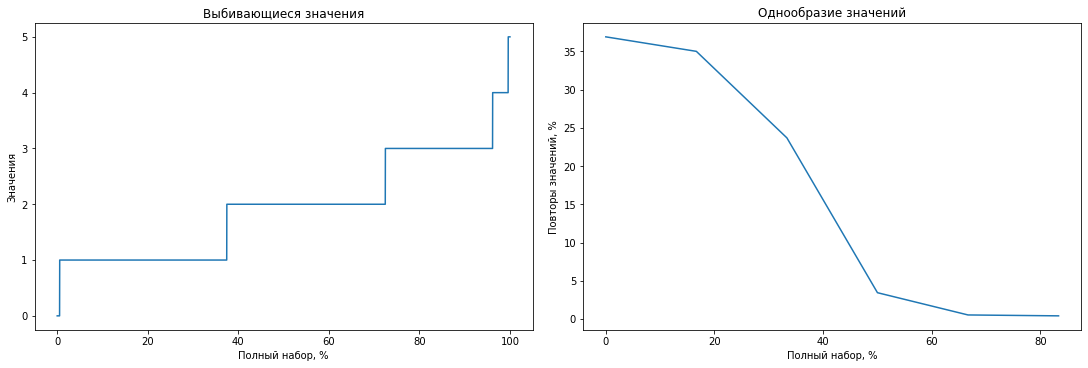

In [205]:
rare_out_plot(flats['rooms'])

***Промежуточный итог***  
  
Число комнат в квартирах центра в большинстве случаев колеблется от 1 до 3, что практически идентично ситуации по всем квартирам в целом.

**Высота потолков**

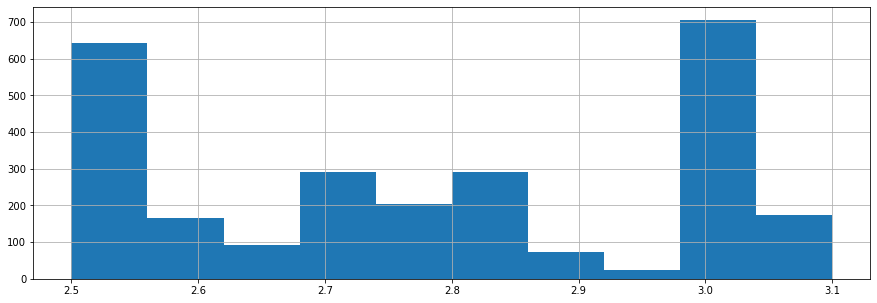

In [206]:
hists(spb_center['ceiling_height'], 0, bins=10)

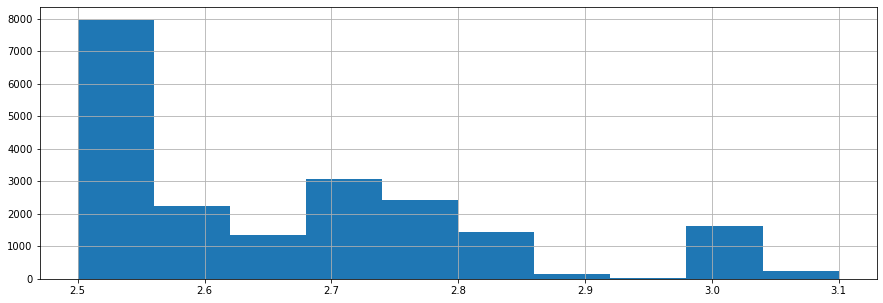

In [207]:
hists(flats['ceiling_height'], 0, bins=10)

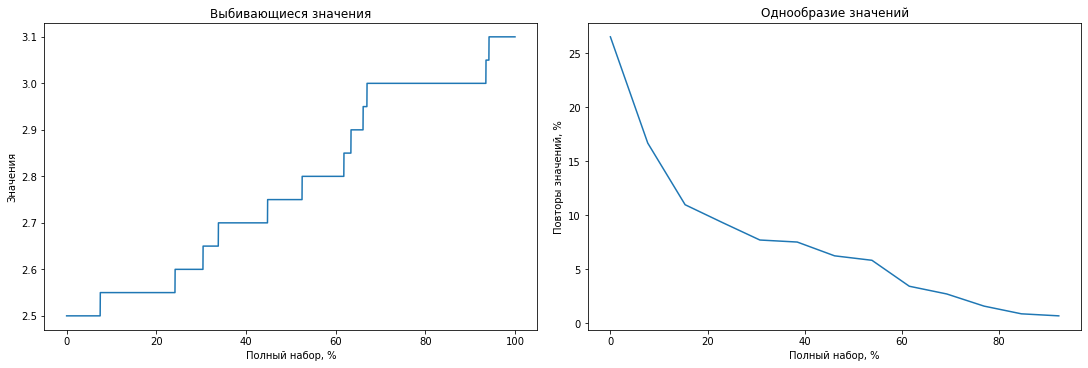

In [208]:
rare_out_plot(spb_center['ceiling_height'])

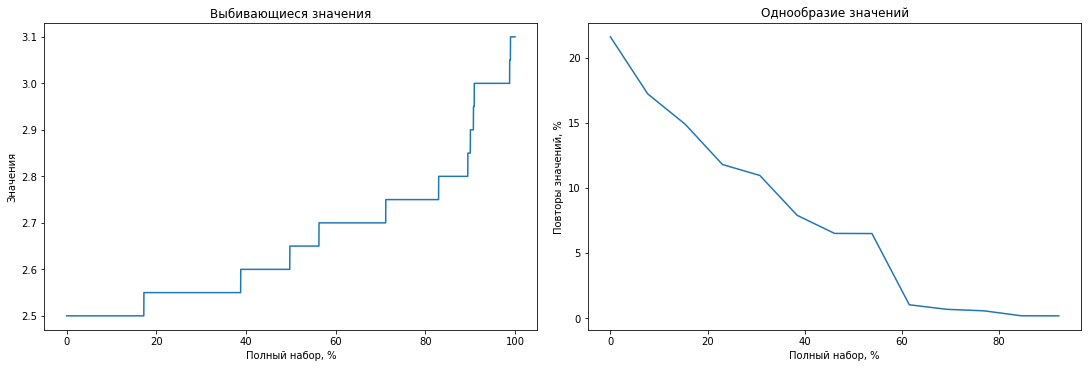

In [209]:
rare_out_plot(flats['ceiling_height'])

***Промежуточный итог***  
  
Квартиры центра гораздо чаще имеют высоту потолков 3.0 м и выше, по сравнению с квартирами в целом

**Выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления)**

In [210]:
spb_center.corr()['last_price'].sort_values(ascending=False)

last_price                      1.000000
last_price_grp                  0.829201
total_area                      0.736527
total_area_grp                  0.701395
living_area                     0.599972
square_meter_price              0.535545
kitchen_area                    0.532221
rooms                           0.441817
ceiling_height                  0.210772
floor                           0.136653
total_images                    0.120820
parks_nearest                   0.119850
days_exposition                 0.116703
balcony                         0.116098
ponds_around_3000               0.115759
floors_total                    0.108795
flat_floor                      0.107442
parks_around_3000               0.076681
ponds_nearest                   0.055543
exposition_month                0.011344
living_total_areas_relation     0.008494
exposition_day                  0.003252
exposition_year                -0.002848
open_plan                      -0.014260
airports_nearest

***Промежуточный итог***  
  
Больше всего на стоимость квартиры влияет её полная площадь и все зависимые от нее (площади) характеристики квартиры -- жилая площадь, площадь кухни, количество комнат.  
    
Зависимость стоимости квартиры от количества комнат -- ниже среднего.  
Зависимость стоимости квартиры от удаленности от центра -- низкая.  
Зависимость стоимости квартиры от этажа квартиры -- низкая.  
Зависимость стоимости квартиры от даты размещения объявления о продажи квартиры -- низкая

# 5 Вывод

После первого, общего взгляда на данные было выполнено:
- переименованы столбцы в *city_centers_nearest*, *parks_around_3000*, *ponds_around_3000*;
- заменены типы данных:
 - _float64_ на _int64_ для столбцов: *last_price*, *floors_total*, *balcony*, *airports_nearest*, *city_centers_nearest*, *parks_around_3000*, *parks_nearest*, *ponds_around_3000*, *ponds_nearest*, *days_exposition*Ж
 - _str_ в _datetime_ для *first_day_exposition*;
- удалены аномальные значения в столбцах: *rooms*, *floors_total*, *locality_name*;
- заменены аномальные значения на референтные для столбцов: *ceiling_height*, *living_area*, *is_apartment*, *kitchen_area*, *balcony*, *airports_nearest*, *city_centers_nearest*, *parks_around_3000*, *parks_nearest*, *ponds_around_3000*, *ponds_nearest*, *days_exposition*.

Затем в DataFrame были добавленны данные, которые позволили провести более точный и удобный анализ, точнее ответить на поставленные вопросы, а именно:
- цена квадратного метра;
- день недели публикации объявления;
- месяц публикации объявления;
- год публикации объявления;
- этаж квартиры в категориях первый, последний, другой;
- соотношение жилой и общей площади;
- соотношение площади кухни и общей площади.

Затем были изучены следующие параметры квартир: площадь, цена, число комнат, высота потолков; были построены гистограммы для каждого параметра. В итоге были сделаны следующие выводы:  
1. *Площад квартир.* С первого взгляда было видно, что имелись аномальные выбросы площадей в 4-ой четверти данных. При этом аномальное количесвто площадей укладывалось в 4% от общего числа.    
2. *Цена квартир.* Отбросив 1% максимальных цен на квартиры данные стали более показательными. На следующих этапах обработки данных исследование в этом направлении было продолжено.  
3. *Количество комнат.* Ограничив рассмотрение количества комнат восмью стало наглядно видно, что основная масса кварир имеет от 2 до 4-х комнат, что соответствует ожидаемому результату.
4. *Высота потолков*. Ограничив рассмотрение высоты потолков от 2.5 до 3.6 м стало наглядно видно, что основная масса кварир имеет потолки от 2.6 м до 2.8 м, что соответствует ожидаемому результату.

Далее было изучено время продажи квартиры; построена гистограмма данного параметра; посчитно среднее и медиана; выяснено, сколько времени обычно занимает продажа; определено когда можно считать, что продажи прошли очень быстро, а когда необычно долго:
- среднее: 171;  
- медиана: 94;  
- обычно, в среднем, продажа квартиры занимет 3 месяца;  
- если продажа квартиры длилась менее 45 дней -- продажа прошла очень быстро;  
- если продажа квартиры длилась более 200 дней -- продажа прошла необычайно долго.  

Затем были убраны редкие и выбивающиеся значения. После данных преобразований размер набора данных уменьшился на 12.97% -- не так мало, как бы хотелось, но будем считать, что до 15% это вполне допустимо. По результатам данного этапа:
- *без изменения остались столбцы*: *first_day_exposition*, *floor*, *is_apartment*, *studio*, *open_plan*, *kitchen_area*, *balcony*, *locality_name*, *airports_nearest*, *city_centers_nearest*, *parks_around_3000*, *parks_nearest*, *ponds_around_3000*, *ponds_nearest*, *total_area_grp*, *last_price_grp*, *square_meter_price*, *exposition_day*, *exposition_month*, *exposition_year*, *flat_floor*, *living_total_areas_relation*, *kitchen_total_areas_relation*.  
- *выбивающиеся значения были удалены в столбцах*: *last_price*, *total_area*, *living_area*, *days_exposition*.
- *редкие значения были удалены в столбцах*: *total_images*, *rooms*
- *выбивающиеся и редкие значения были удалены в столбцах*: *floors_total*, *ceiling_height*

Далее было определено, какие факторы больше всего влияют на стоимость квартиры; изучено, как зависит цена от квадратного метра, числа комнат, удалённости от центра; изучена зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом, зависимость от даты размещения: дня недели, месяца и года. Были сделаны следующие выводы:
- больше всего на стоимость квартиры влияет её полная площадь и все зависимые от нее (площади) характеристики квартиры -- жилая площадь, площадь кухни, количество комнат;  
- зависимость стоимости квартиры от цены на квадратный метр -- выше среднего;  
- зависимость стоимости квартиры от количества комнат -- ниже среднего;  
- зависимость стоимости квартиры от удаленности от центра -- низкая;  
- зависимость стоимости квартиры от этажа квартиры -- низкая;  
- зависимость стоимости квартиры от даты (день, месяц, год) размещения объявления о продаже -- пренебрежительно мала

Затем были выбраны 10 населённых пунктов с наибольшим числом объявлений; посчитано средняя цена квадратного метра в этих населённых пунктах; выделены населённые пункты с самой высокой и низкой стоимостью жилья. Наиболее дорогая недвижимость, ожидаемо, оказалась в Санкт-Петербурге. Наименее дорогая недвижимость -- в Выборге.

Далее были выделены квартиры в Санкт-Петербурге; выяснено, какая область входит в центр -- создан столбец с расстоянием до центра в километрах, округленное до целых значений, посчитна средняя цена для каждого километра, построен график, который показал, как цена зависит от удалённости от центра. По итогам данного задания центром псчитали область, входящую в зону с удалением от центра не более 9 км -- после данной удаленности цена квартир неуклонно снижается.

В финале был выделить сегмент квартир в центре; проанализирована эта территория и изучены следующие параметры: площадь, цена, число комнат, высота потолков; также были выделены факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). По итогам выполнения задания были сделаны следующие выводы:  
1. *Площадь квартир.* Квартиры в центре имеют, в большинсте случаев, площадь от 40 кв.м. до 120 кв.м., при этом вариантов площадей в этом диапазоне большое множество. Иными словами, квартиры в центре имеют такие же площади, как все квартиры в целом.
2. *Цена квартир.* Квартиры в центре по цене занимают второую половину диапазона цен всех квартир, при этом вариантов цен в этом диапазоне большое множество
3. *Число комнат.* Число комнат в квартирах центра в большинстве случаев колеблется от 1 до 3, что практически идентично ситуации по всем квартирам в целом.
4. *Высота потолков.* Квартиры центра гораздо чаще имеют высоту потолков 3.0 м и выше, по сравнению с квартирами в целом
5. Больше всего на стоимость квартиры влияет её полная площадь и все зависимые от нее (площади) характеристики квартиры -- жилая площадь, площадь кухни, количество комнат. При этом:  
 - зависимость стоимости квартиры от количества комнат -- ниже среднего.  
 - зависимость стоимости квартиры от удаленности от центра -- низкая.  
 - зависимость стоимости квартиры от этажа квартиры -- низкая.  
 - зависимость стоимости квартиры от даты размещения объявления о продаже -- низкая, но выше, по сравнению со всеми квартирами в целом